# Telco Customer Churn Prediction

![fmtrr.png](https://media.licdn.com/dms/image/D4D12AQHdV5ztbrMvPg/article-cover_image-shrink_600_2000/0/1692641513128?e=2147483647&v=beta&t=P7i36VFGS5YBmhsV2kILoBshaa-7SXYmWj8FnP5QJ5M)

Bu not defterimizde şirketten ayrılacak müşterileri tahmin edebilecek bir makine öğrenmesi modeli geliştireceğiz.

Modellemeden önce, veri seti için keşfedici veri analizi ve özellik mühendisliği yapacağız.

Veri seti, demografik bilgiler, abone olunan hizmetler, sözleşme ayrıntıları, ücretler ve müşterinin ayrılıp ayrılmadığı (şirketten ayrılıp ayrılmadığı) dahil olmak üzere bir telekomünikasyon şirketine ilişkin müşteri bilgileriyle ilgili çeşitli sütunlar içerir.

Değişkenlerin Açıklamaları

* CustomerID : Client ID
* Gender : Client Sexuality
* SeniorCitizen : Müşterinin yaşlı olup olmadığı (1:Evet, 0:Hayır)
* Partner :Müşterinin partneri olup olmadığı (Evet, Hayır)
* Dependents: Müşterinin bakmakla yükümlü olduğu kişilerin olup olmadığı (Evet, Hayır)
* tenure : Müşterinin şirkette kaldığı ay sayısı
* PhoneService: Müşterinin telefon hizmeti olup olmadığı (Evet veya Hayır)
* MultipleLines : İstemcinin birden fazla hattı olup olmadığı (Evet, Hayır, Telefon hizmeti yok)
* InternetService: Müşterinin internet hizmetinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* OnlineSecurity : Müşterinin çevrimiçi güvenliğinin olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* OnlineBackup : İstemcinin çevrimiçi yedeklemesi olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* DeviceProtection: İstemcinin cihaz korumasının olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* TechSupport: İstemcinin cihaz korumasının olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingTV: İstemcinin TV kanalı yayını olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* StreamingMovies : İstemcinin film akışı kanalı olup olmadığı (Evet, Hayır, İnternet hizmeti yok)
* Contract: Müşterinin sözleşme süresi (aydan aya, bir yıl, iki yıl)
* PaperlessBiling: Müşterinin kağıtsız faturası olup olmadığı (Evet, Hayır)
* PaymentMethod : Müşteri ödeme yöntemi (Elektronik çek, posta, banka havalesi (otomatik), kredi kartı (otomatik)
* MonthlyCharges: Müşteriden alınan aylık tutar
* TotalCharges: Müşteriden alınan yıllık tutar
* Churn

# Importing necessary libraries and dataset

In [1]:
!pip install catboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
# !pip install missingno
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression


In [3]:
df = pd.read_csv("C:\\Users\\shera\\Downloads\\Customer-Churn-Analyzer-with-ML-main\\data\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# Exploratory Data Analysis

In [4]:
def check_data(dataframe,head=5):
    print(20*"-" + "Information".center(20) + 20*"-")
    print(dataframe.info())
    print(20*"-" + "Data Shape".center(20) + 20*"-")
    print(dataframe.shape)
    print("\n" + 20*"-" + "The First 5 Data".center(20) + 20*"-")
    print(dataframe.head())
    print("\n" + 20 * "-" + "Missing Values".center(20) + 20 * "-")
    print(dataframe.isnull().sum())
    print("\n" + 40 * "-" + "Describe the Data".center(40) + 40 * "-")
    print(dataframe.describe([0.01, 0.05,0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T)

check_data(df)

--------------------    Information     --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-n

### Yorumlar

Veri kümesinde eksik değer yok, bu iyi bir şey. Ancak veri türleriyle ilgili birkaç gözlem vardır:

* TotalCharges: Bu sütun şu anda nesne (dize) biçimindedir; bu, sayısal olmayan karakterlerin mevcut olduğunu gösterebilir. Bu sütun ideal olarak analiz için sayısal formatta olmalıdır.

* SeniorCitizen: Bir tam sayıdır (int64), eğer ikili bir gösterge (0 veya 1) olacaksa uygundur. Ancak yaş kategorisi olacaksa bunu da gözden geçirmemiz gerekebilir.

* Müşteri Kimliği: Nesne türü olarak doğru olsa da, bireysel müşterileri takip etmediğimiz sürece bu sütun analiz için gerekli olmayabilir.

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for any new missing values in 'TotalCharges'
new_missing_values = df['TotalCharges'].isnull().sum()
new_missing_values

np.int64(11)

TotalCharges sütununun sayısal formata dönüştürülmesi 11 yeni eksik değerle sonuçlandı. Bunlar muhtemelen orijinal verilerin sayısal olmayan karakterlere veya sayılara dönüştürülemeyen boş dizelere sahip olduğu durumlardır.

Bu eksik değerleri ele almak için birkaç seçeneğimiz var:

Satırları Kaldırın: Veri kümesi yeterince büyükse 11 satırın kaldırılması analizi önemli ölçüde etkilemeyebilir.

Değerleri Değerlendirin: Bu eksik değerleri ortalama, medyan gibi bir istatistikle veya diğer sütunlara dayalı bir değerle doldurabiliriz (örneğin, Toplam Ücretleri tahmin etmek için Aylık Ücretleri ve görev süresini kullanarak).

Daha Fazla Araştırın: Karar vermeden önce, değerlerin neden eksik olduğunu anlamak için bu belirli satırlara bakmak isteyebiliriz.

In [6]:
# Display the rows with missing values in 'TotalCharges'
missing_total_charges_rows = df[df['TotalCharges'].isnull()]
missing_total_charges_rows

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

Toplam Ücretlerin eksik olduğu satırlar incelendiğinde bir model ortaya çıkıyor: tüm bu müşterilerin kullanım süresi 0'dır. Bu, bu müşterilerin yeni olduğunu ve henüz faturalandırılmadığını gösterir; bu da toplam ücretlerin yokluğunu açıklar.

In [7]:
df['TotalCharges'].fillna(0, inplace=True)


C:\Users\shera\AppData\Local\Temp\ipykernel_12232\4062339387.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(0, inplace=True)


In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Since CustomerID is likely a unique identifier for each customer and may not contribute to aggregate data analysis, we could either keep it for identification purposes or remove it if it's not needed for the analysis.

In [9]:
df.drop('customerID', axis=1, inplace=True)

# Display the first few rows of the dataset to confirm the drop
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

Veri kümesi üzerinde Keşifsel Veri Analizi (EDA) gerçekleştireceğiz. EDA, veri içindeki dağılımı, eğilimleri ve ilişkileri anlamamıza yardımcı olduğundan veri analizinde çok önemli bir adımdır. İşte EDA'mız için bir plan:

1. **Özet İstatistikler:** Sayısal sütunlar için temel özet istatistiklerle başlayacağız.
2. **Değişkenlerin Dağılımı:** Hem sayısal ("görev süresi", "Aylık Ücretler", "Toplam Ücretler" gibi) hem de kategorik ("cinsiyet", "InternetService", "Sözleşme" gibi) temel değişkenlerin dağılımını analiz edin.
3. **Korelasyon Analizi:** Sayısal değişkenler arasındaki korelasyonları inceleyin.
4. **Churn Analizi:** Hedef değişken "Churn" olduğundan, özellikle farklı değişkenlerin aboneyi kaybetme oranlarıyla nasıl ilişkili olduğuna odaklanacağız.
5. **Görselleştirmeler:** Verileri görselleştirmek ve kalıpları ortaya çıkarmak için çeşitli grafikler (histogramlar, çubuk grafikler, kutu grafikleri ve dağılım grafikleri gibi) kullanacağız.


## Summary Statistics

In [10]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
 
   # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 20
cat_cols: 17
num_cols: 3
cat_but_car: 0
num_but_cat: 1


## Numerik Değişkenler

In [11]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
df[num_cols].describe().T

count         mean          std    min     25%      50%  \
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

### Conclusions

Tenure : Ortalama tenure(görev süresi) yaklaşık 32 aydır ve geniş bir aralıktadır (0 ila 72 ay), bu da yeni ve uzun vadeli müşterilerin bir karışımını gösterir.

Aylık Ücretler: Ortalama aylık ücret yaklaşık 64,76 ABD Doları olup, ücretler 18,25 ile 118,75 ABD Doları arasında değişmektedir.

Toplam Ücretler: Toplam ücretler büyük farklılıklar gösterir ve ortalama 2279,73 USD civarındadır. Dağıtım çarpıktır ve maksimum ücret 8684,80 USD'dir.


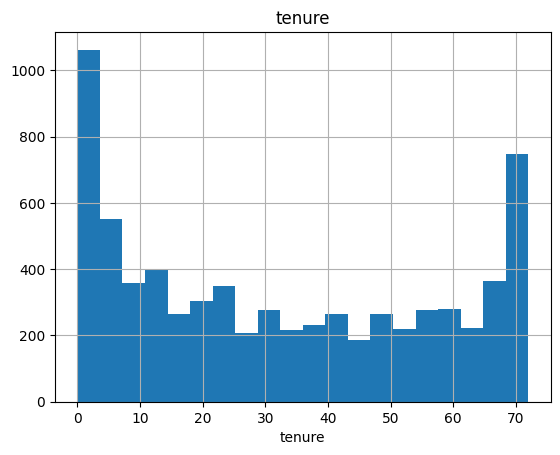

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
10%         2.000000
20%         6.000000
40%        20.000000
50%        29.000000
60%        40.000000
80%        60.000000
90%        69.000000
95%        72.000000
99%        72.000000
max        72.000000
Name: tenure, dtype: float64


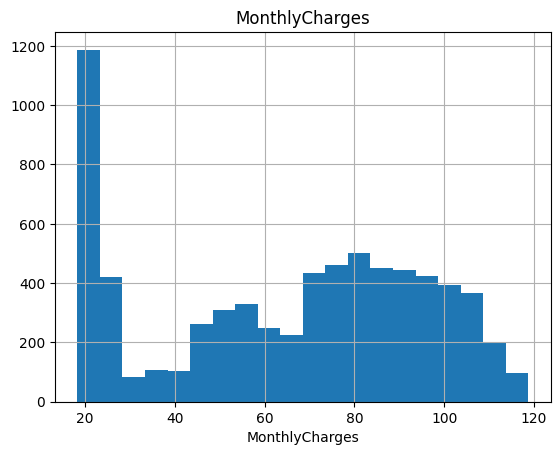

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
10%        20.050000
20%        25.050000
40%        58.830000
50%        70.350000
60%        79.100000
80%        94.250000
90%       102.600000
95%       107.400000
99%       114.729000
max       118.750000
Name: MonthlyCharges, dtype: float64


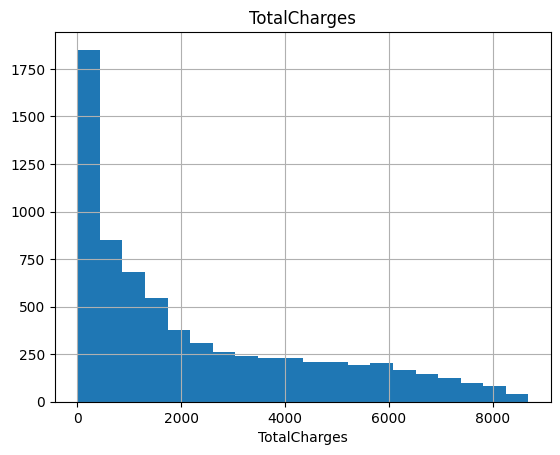

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
10%        83.470000
20%       265.320000
40%       939.780000
50%      1394.550000
60%      2043.710000
80%      4471.440000
90%      5973.690000
95%      6921.025000
99%      8039.256000
max      8684.800000
Name: TotalCharges, dtype: float64


In [13]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.10, 0.20, 0.40, 0.50, 0.60, 0.80, 0.90, 0.95, 0.99]

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
        print(dataframe[numerical_col].describe(quantiles).T)


for col in num_cols:
    num_summary(df, col, plot=True)

### Yorum

* Tenure(Görev süresi): Dağılım, önemli sayıda yeni müşteriyi (düşük kullanım süresi) ve önemli sayıda uzun vadeli müşteriyi (yüksek kullanım süresi) gösteren iki zirve göstermektedir. Bu iki modlu dağılım, şirketteki süreleri açısından iki ana müşteri grubunu akla getiriyor.


* Aylık Ücretler: Dağıtım biraz iki modludur; bir tepe noktası alt uçta (yaklaşık 20 ABD Doları) ve diğeri üst uçta (yaklaşık 80-90 ABD Doları) bulunur. Bu, abone oldukları hizmetlere göre farklı müşteri gruplarının bulunduğunu gösteriyor; bazıları temel, daha düşük maliyetli hizmetleri, diğerleri ise daha pahalı paketleri tercih ediyor.


* Toplam Masraflar: Dağıtım sağa çarpıktır, bu da çok sayıda müşterinin nispeten daha düşük toplam ücretlere sahip olduğunu gösterir; bu da önemli sayıda müşterinin daha düşük kullanım süresine sahip olduğuyla uyumludur


## Kategorik Değişkenler

In [14]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [15]:
df[cat_cols].describe(include=["object"])

gender Partner Dependents PhoneService MultipleLines InternetService  \
count    7043    7043       7043         7043          7043            7043   
unique      2       2          2            2             3               3   
top      Male      No         No          Yes            No     Fiber optic   
freq     3555    3641       4933         6361          3390            3096   

       OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV  \
count            7043         7043             7043        7043        7043   
unique              3            3                3           3           3   
top                No           No               No          No          No   
freq             3498         3088             3095        3473        2810   

       StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
count             7043            7043             7043              7043   
unique               3               3                2                 4   
top                 No  Month-to-month              Yes  Electronic check   
freq              2785            3875             4171              2365   

       Churn  
count   7043  
unique     2  
top       No  
freq    5174

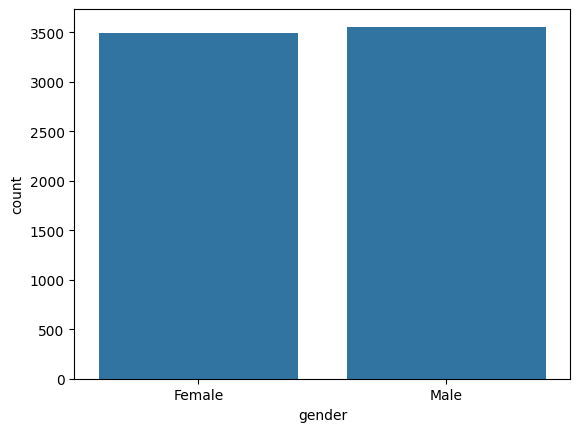

        gender     Ratio
gender                  
Male      3555  50.47565
Female    3488  49.52435
##########################################


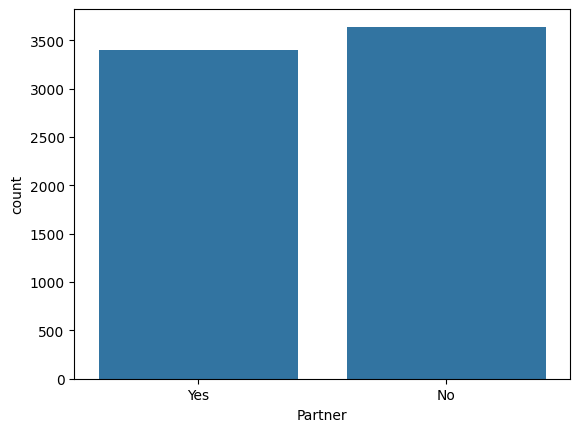

         Partner     Ratio
Partner                   
No          3641  51.69672
Yes         3402  48.30328
##########################################


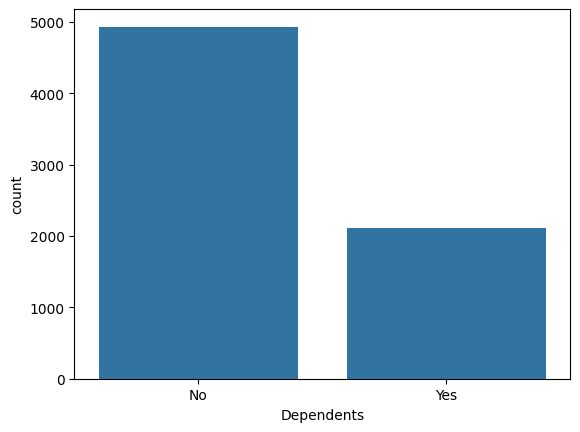

            Dependents      Ratio
Dependents                       
No                4933  70.041176
Yes               2110  29.958824
##########################################


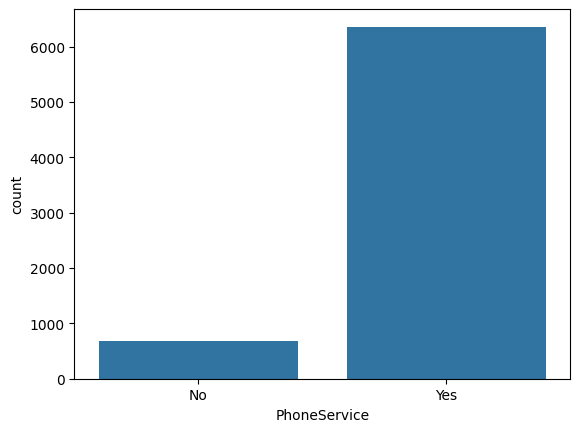

              PhoneService      Ratio
PhoneService                         
Yes                   6361  90.316626
No                     682   9.683374
##########################################


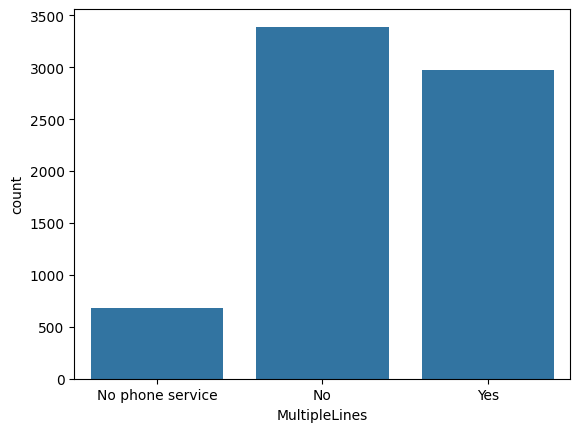

                  MultipleLines      Ratio
MultipleLines                             
No                         3390  48.132898
Yes                        2971  42.183729
No phone service            682   9.683374
##########################################


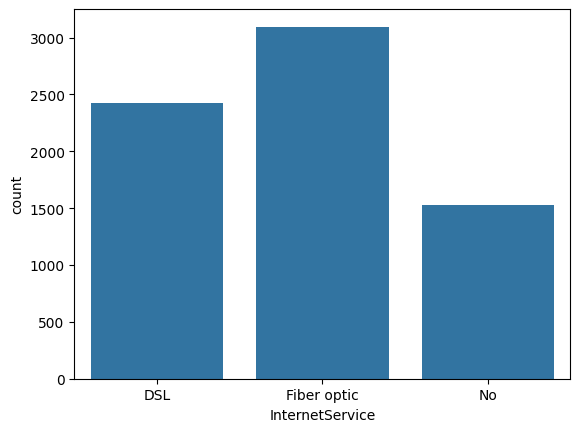

                 InternetService      Ratio
InternetService                            
Fiber optic                 3096  43.958540
DSL                         2421  34.374556
No                          1526  21.666903
##########################################


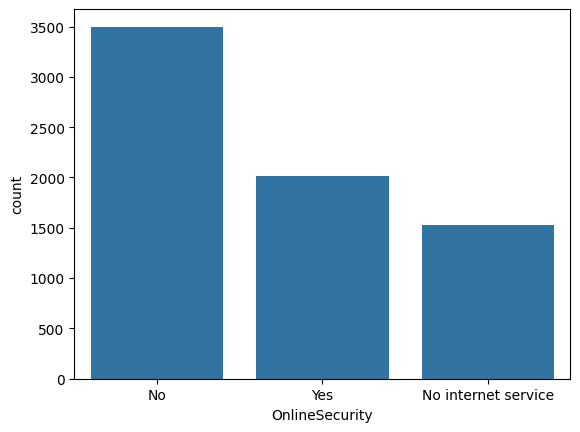

                     OnlineSecurity      Ratio
OnlineSecurity                                
No                             3498  49.666335
Yes                            2019  28.666761
No internet service            1526  21.666903
##########################################


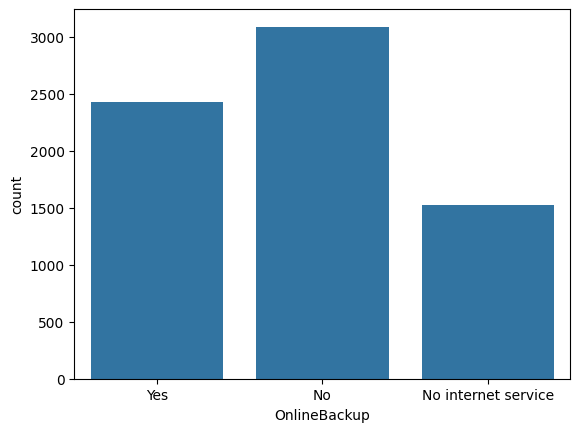

                     OnlineBackup      Ratio
OnlineBackup                                
No                           3088  43.844952
Yes                          2429  34.488144
No internet service          1526  21.666903
##########################################


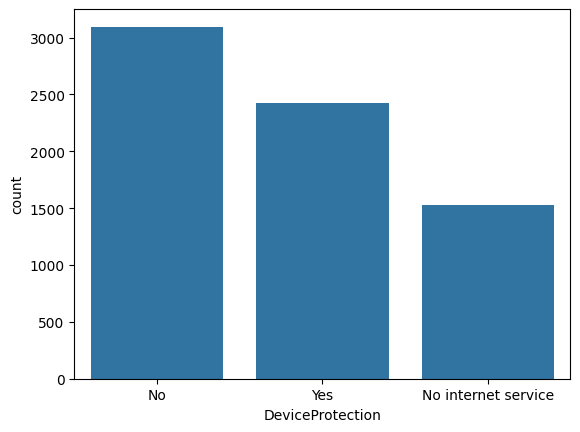

                     DeviceProtection      Ratio
DeviceProtection                                
No                               3095  43.944342
Yes                              2422  34.388755
No internet service              1526  21.666903
##########################################


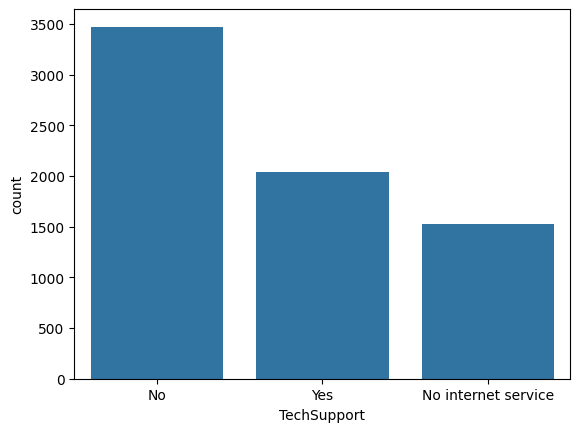

                     TechSupport      Ratio
TechSupport                                
No                          3473  49.311373
Yes                         2044  29.021724
No internet service         1526  21.666903
##########################################


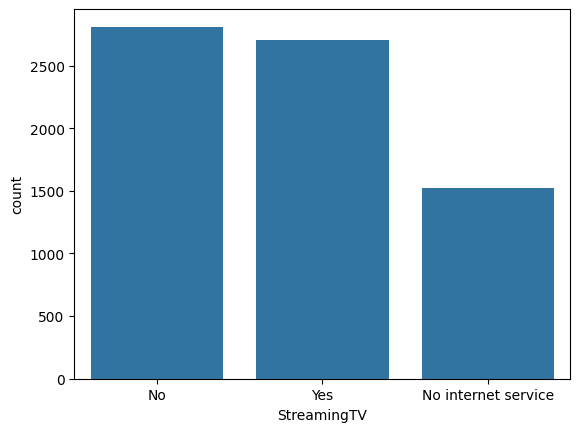

                     StreamingTV      Ratio
StreamingTV                                
No                          2810  39.897771
Yes                         2707  38.435326
No internet service         1526  21.666903
##########################################


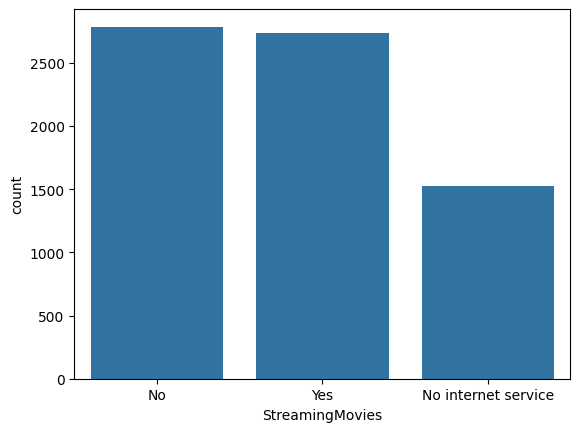

                     StreamingMovies      Ratio
StreamingMovies                                
No                              2785  39.542808
Yes                             2732  38.790288
No internet service             1526  21.666903
##########################################


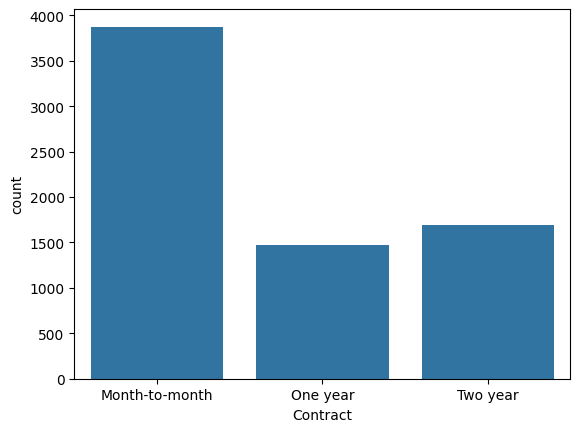

                Contract      Ratio
Contract                           
Month-to-month      3875  55.019168
Two year            1695  24.066449
One year            1473  20.914383
##########################################


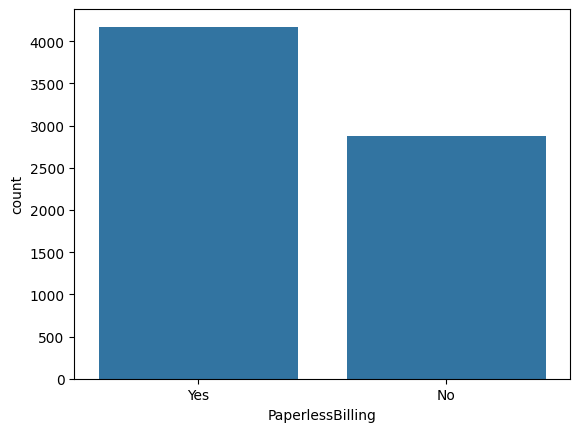

                  PaperlessBilling      Ratio
PaperlessBilling                             
Yes                           4171  59.221922
No                            2872  40.778078
##########################################


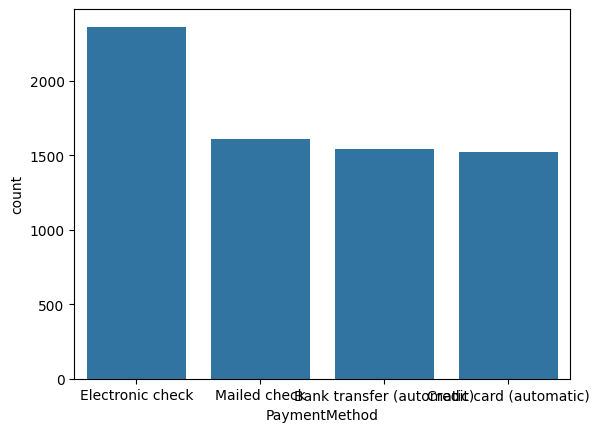

                           PaymentMethod      Ratio
PaymentMethod                                      
Electronic check                    2365  33.579441
Mailed check                        1612  22.887974
Bank transfer (automatic)           1544  21.922476
Credit card (automatic)             1522  21.610109
##########################################


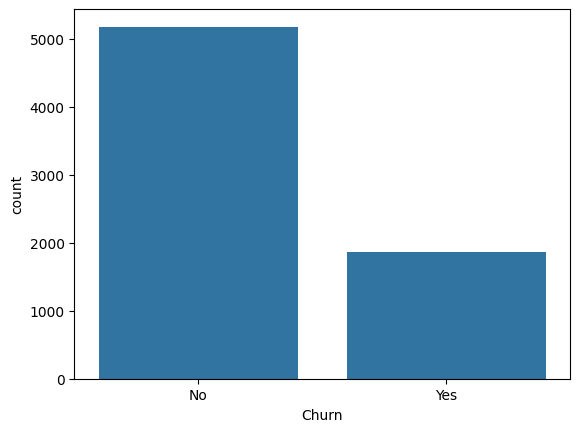

       Churn      Ratio
Churn                  
No      5174  73.463013
Yes     1869  26.536987
##########################################


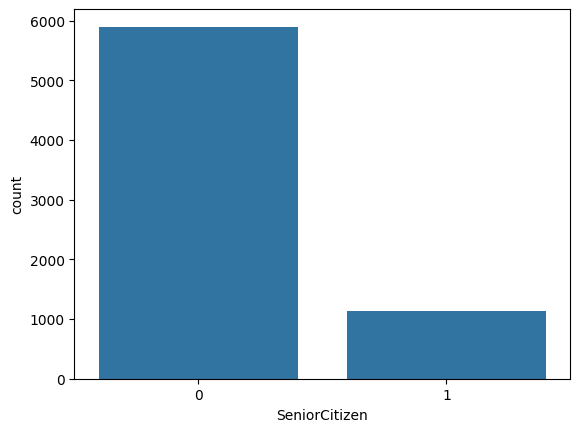

               SeniorCitizen      Ratio
SeniorCitizen                          
0                       5901  83.785319
1                       1142  16.214681
##########################################


In [16]:
def cat_summary(dataframe, col_name, plot=False):
    
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print("##########################################")


for col in cat_cols:
    cat_summary(df, col,plot=True)

### Conclusion:

* Cinsiyet: Erkek ve kadın müşteri sayısı hemen hemen eşittir.

* Ortak ve Bağımlı Kişiler: Biraz daha fazla sayıda müşterinin ortağı veya bakmakla yükümlü olduğu kişiler yoktur.

* PhoneService: Çoğu müşterinin (yaklaşık %90'ı) telefon hizmeti vardır.

* MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: 
Bu sütunlar çeşitli kategorilere sahiptir ve müşterilerin çoğunluğu çevrimiçi güvenlik, teknik destek vb. ek hizmetlere sahip değildir.

* Contract: En yaygın sözleşme türü aydan ayadır.

* PaperlessBilling: Müşterilerin çoğunluğu (yaklaşık %59) kağıtsız faturalandırmayı kullanıyor.

* PaymentMethod: En yaygın ödeme yöntemi elektronik çektir.

* Churn: Kaybetme sütunundaki 'Hayır' sıklığının gösterdiği gibi, kaybetme oranı elde tutma oranından daha düşüktür.

## Churn Analizi

In [17]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [18]:
df["Churn"] = df["Churn"].map({'No':0,'Yes':1})


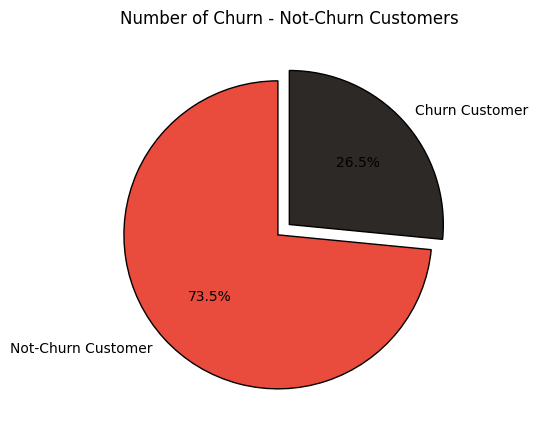

In [19]:
colors = ['#E94B3C','#2D2926']


l = list(df['Churn'].value_counts())
circle = [l[0] / sum(l) * 100,l[1] / sum(l) * 100]

fig = plt.subplots(figsize = (20,5))
plt.pie(circle,labels = ['Not-Churn Customer','Churn Customer'],autopct = '%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Churn - Not-Churn %');

plt.title('Number of Churn - Not-Churn Customers');
plt.show()

The dataset is unbalanced in a near about 3 : 1 ratio for Not-Churn : Churn customers!

Due to this, predictions will be biased towards Not-Churn customers.

Visualizations will also display this bias!

Müşteri Kayıp Dağılımı grafiği ve hesaplanan kayıp oranı aşağıdaki bilgileri sağlar:

Müşterilerin yaklaşık %73,46'sı ayrılmadı, bu da çoğunluğun istikrarlı müşteriler olduğunu gösteriyor.

Müşterilerin yaklaşık %26,54'ü işten ayrıldı; bu önemli bir orandır ve işletme için endişe kaynağı olabilir.

Bu kayıp oranı, müşteri kaybına katkıda bulunan faktörlerin anlaşılmasının önemini vurgulamaktadır. İşletmeler bu bilgileri müşteri tutmayı iyileştirmeye yönelik stratejiler geliştirmek için kullanabilir.

## Categorical Variables vs Target Variable (Churn):


Next, let's analyze the distribution of some key categorical variables, especially those that might have a significant impact on churn, like Contract, InternetService, and PaymentMethod. 

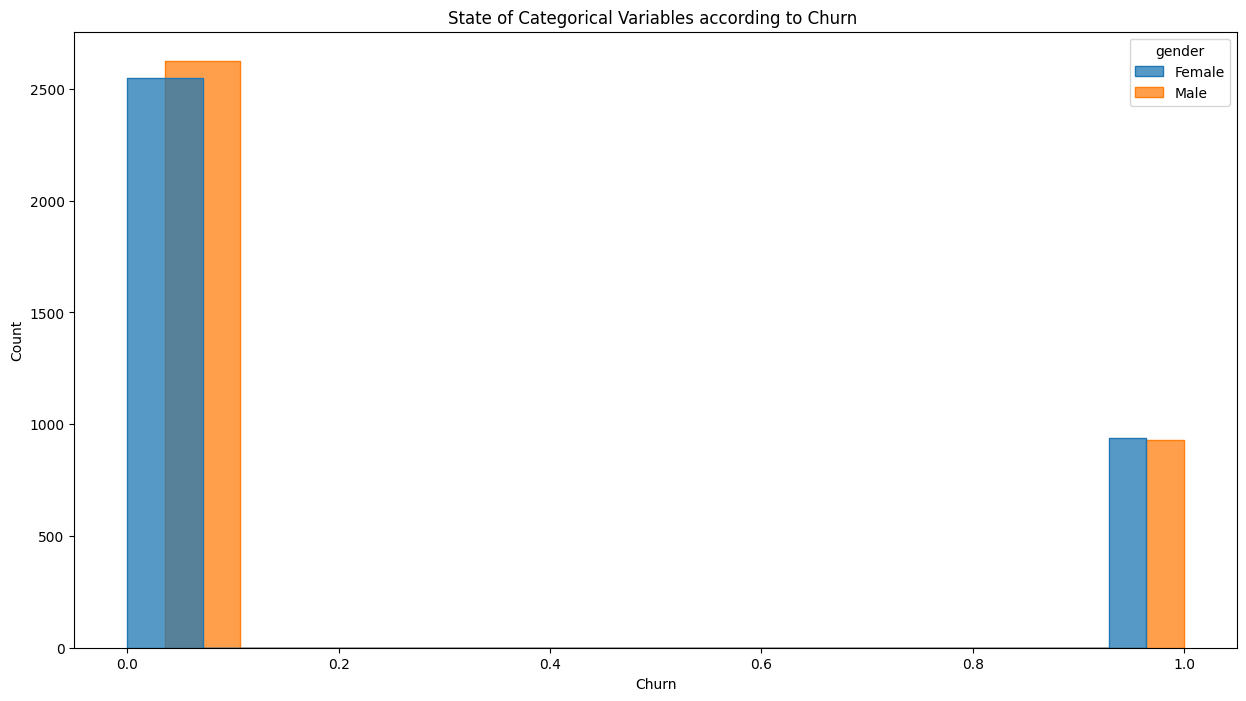

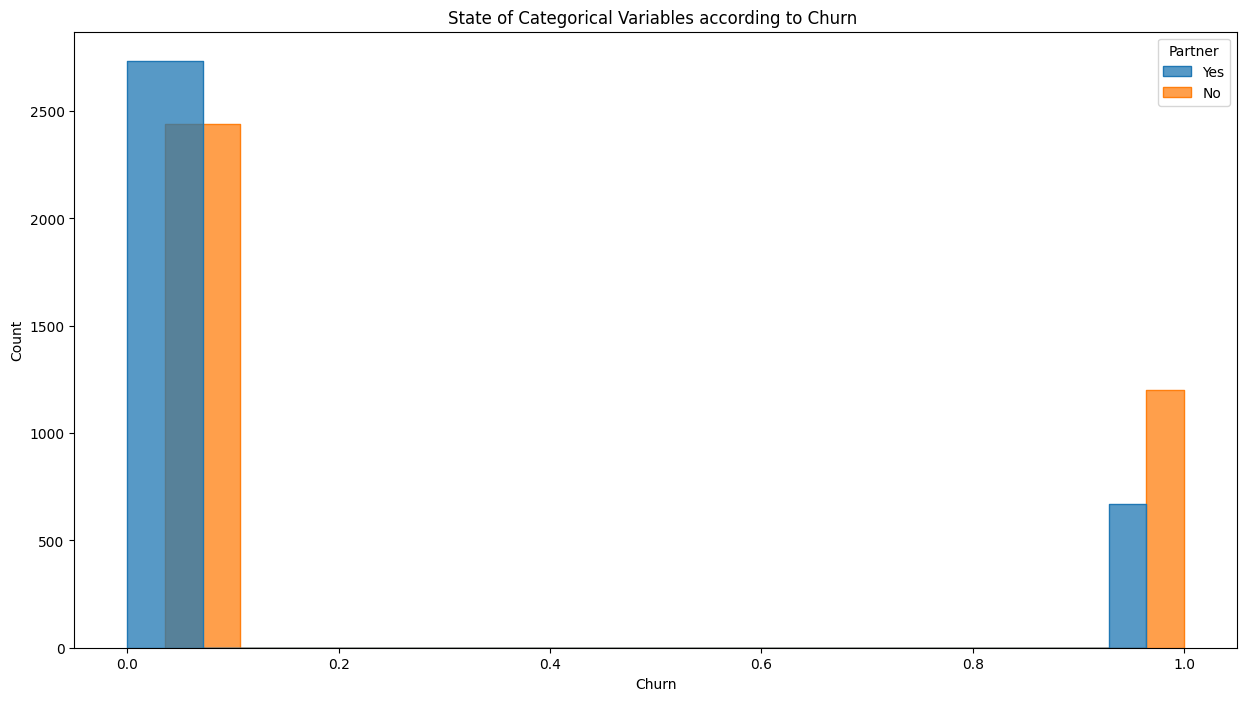

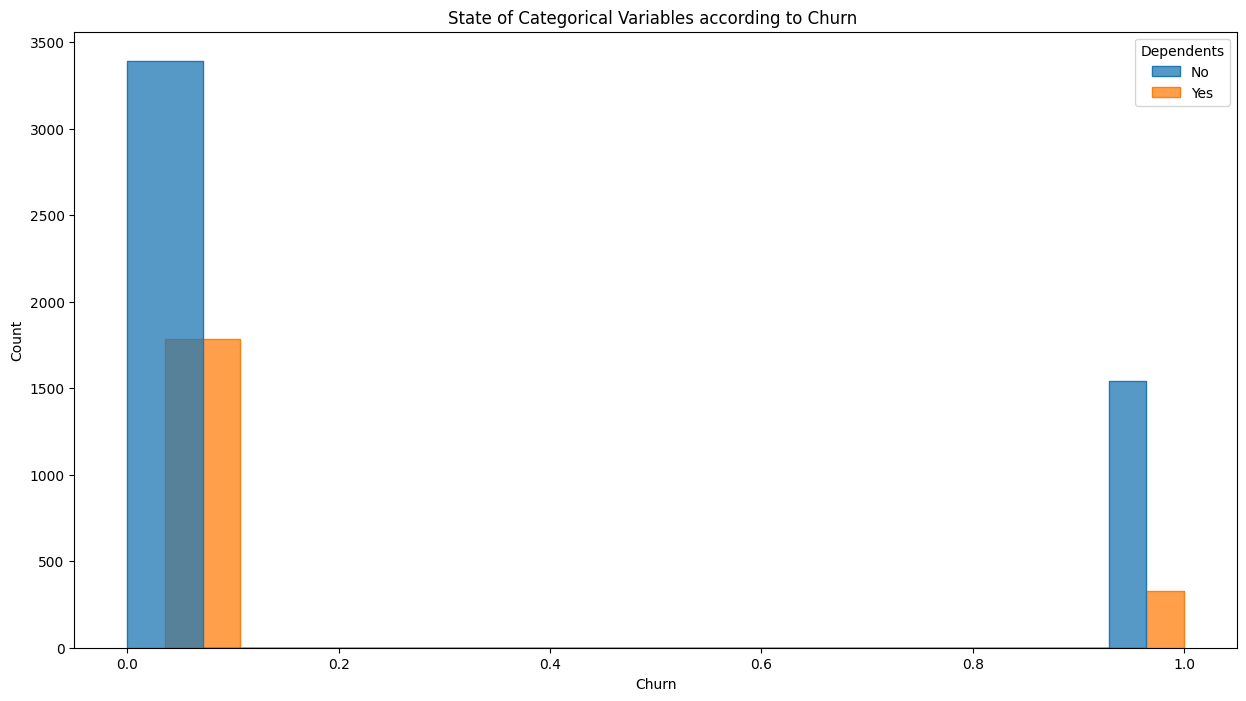

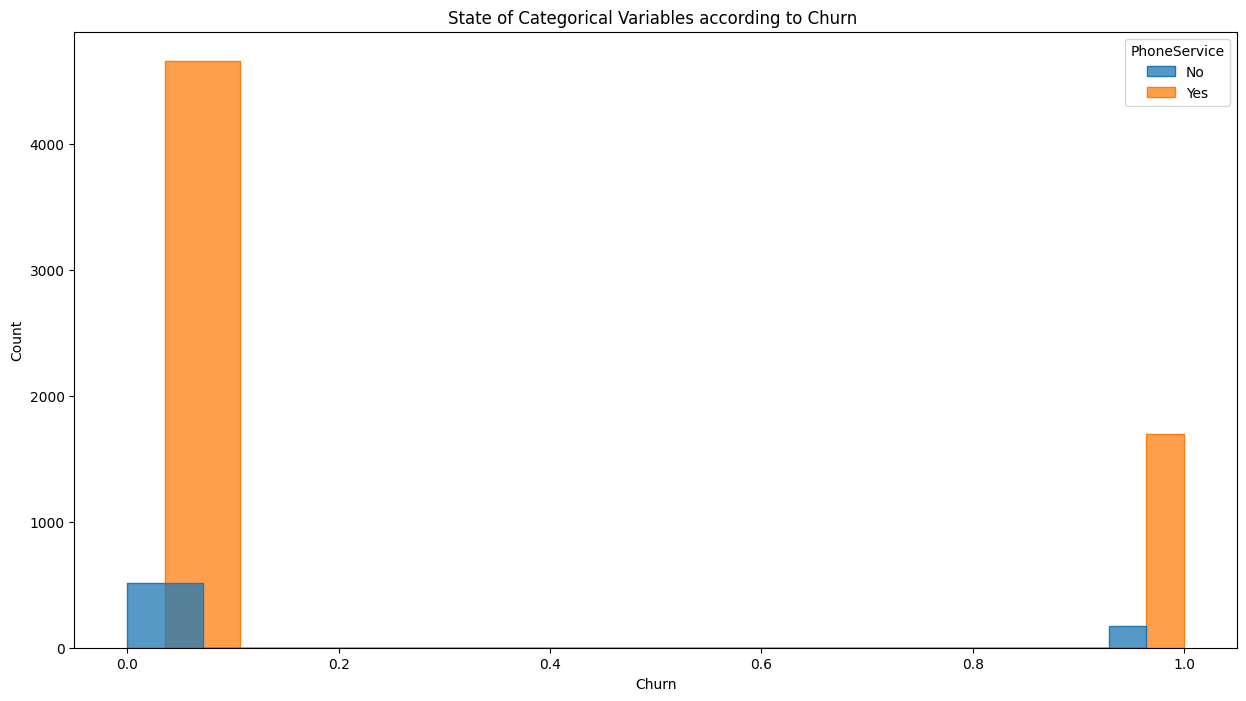

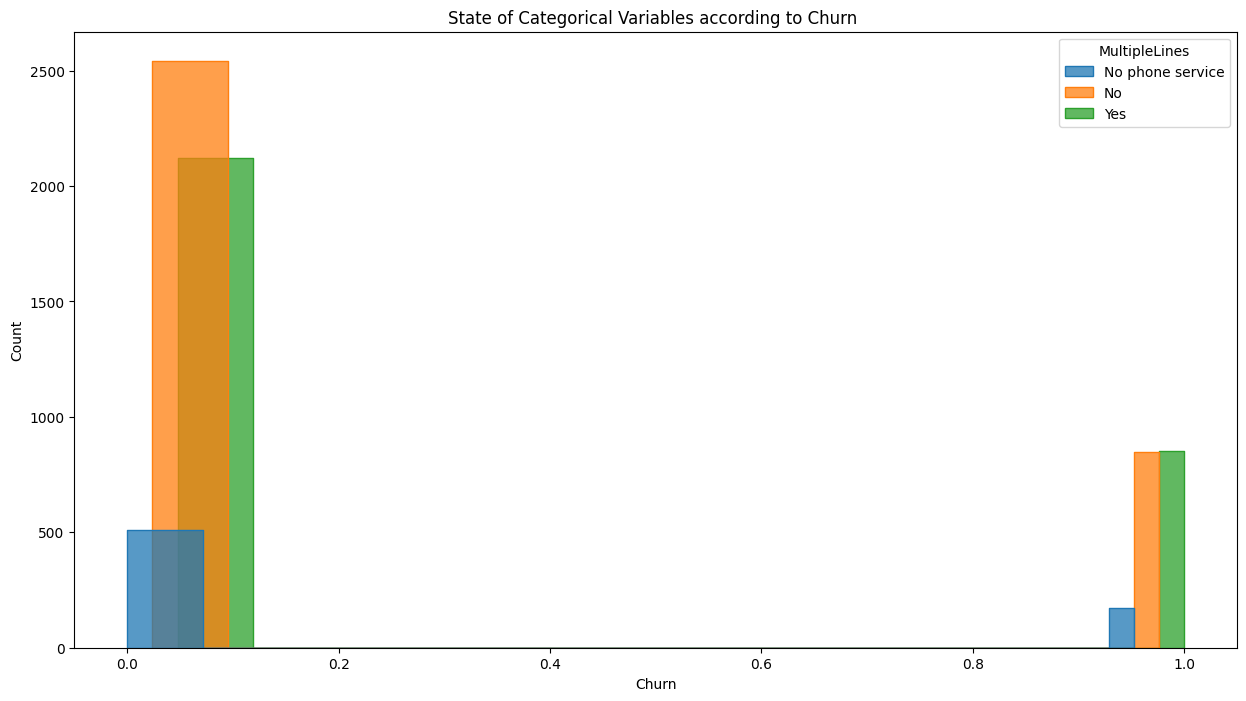

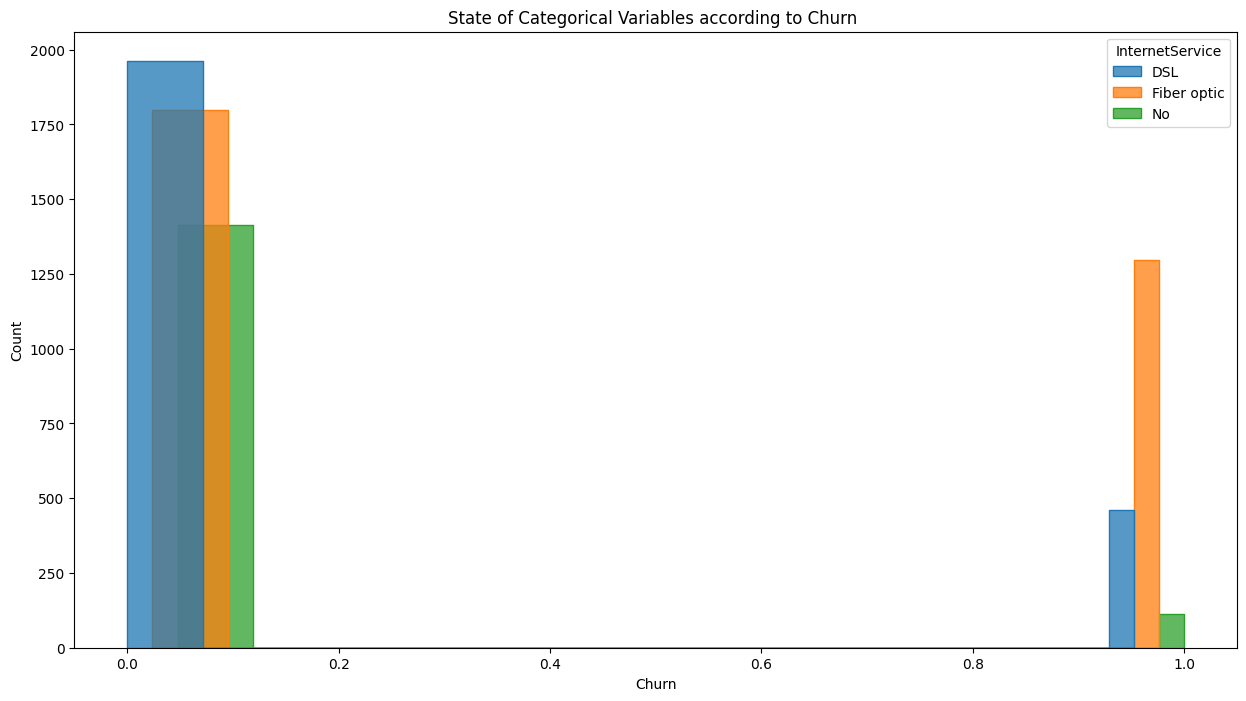

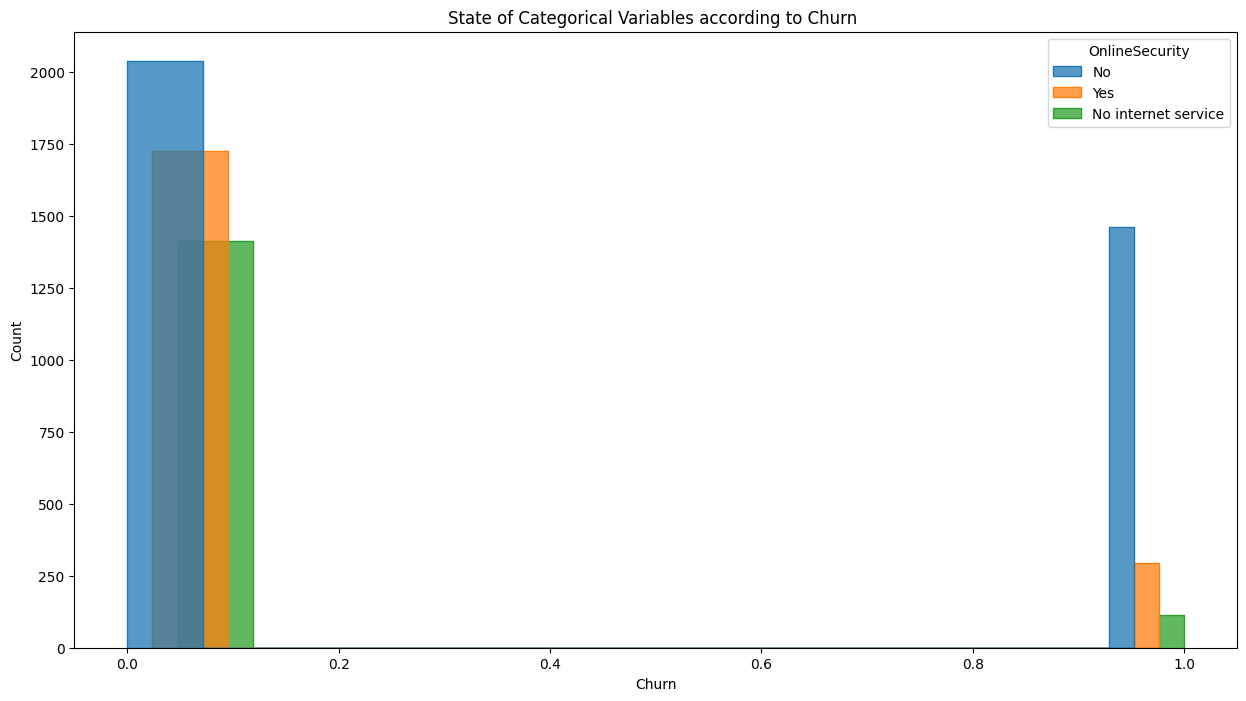

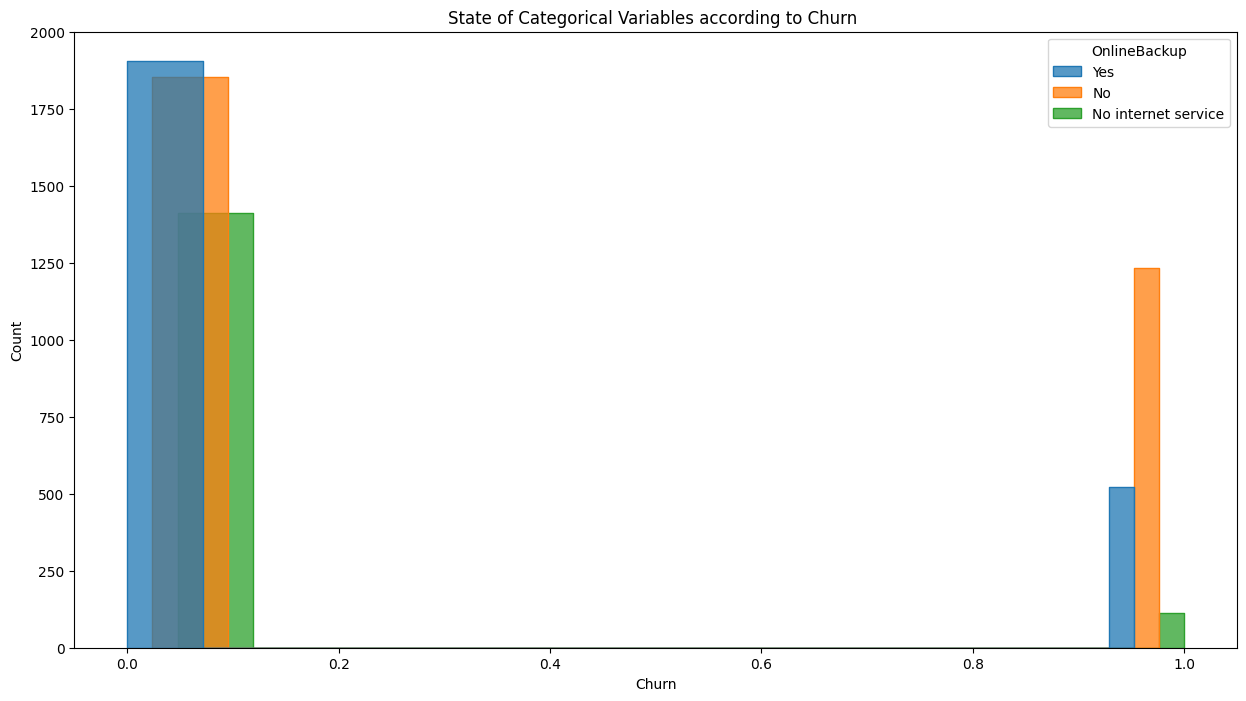

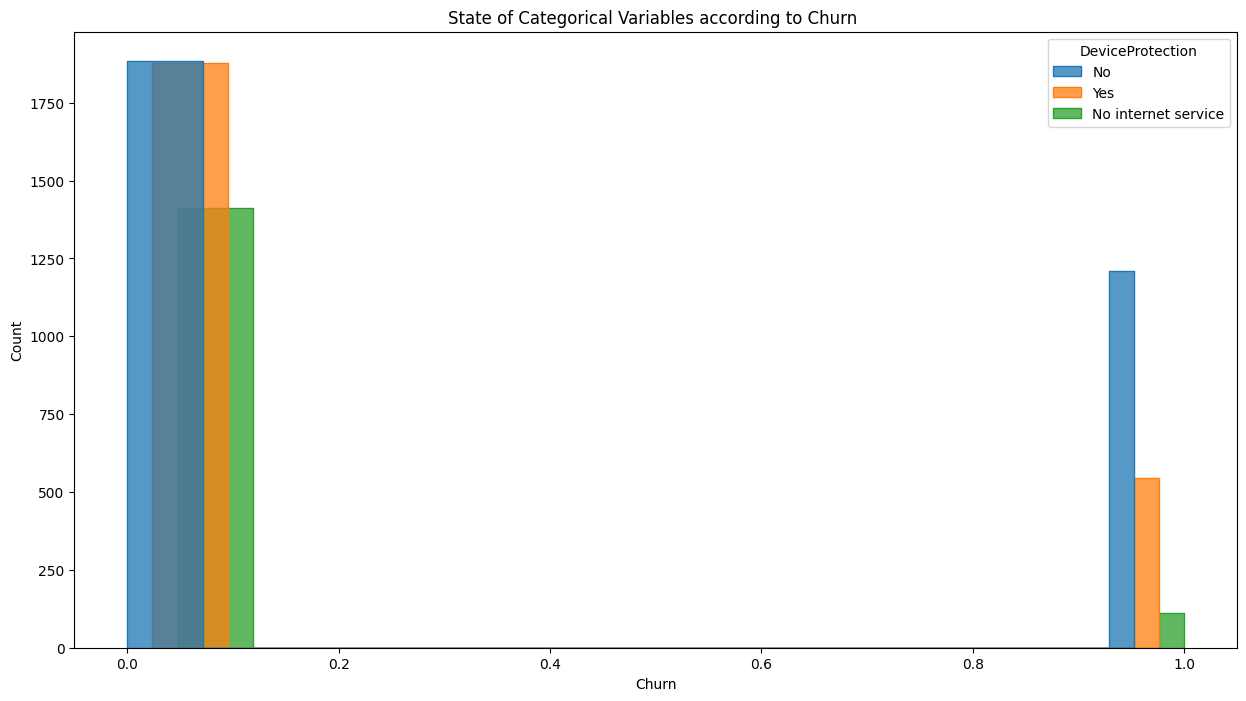

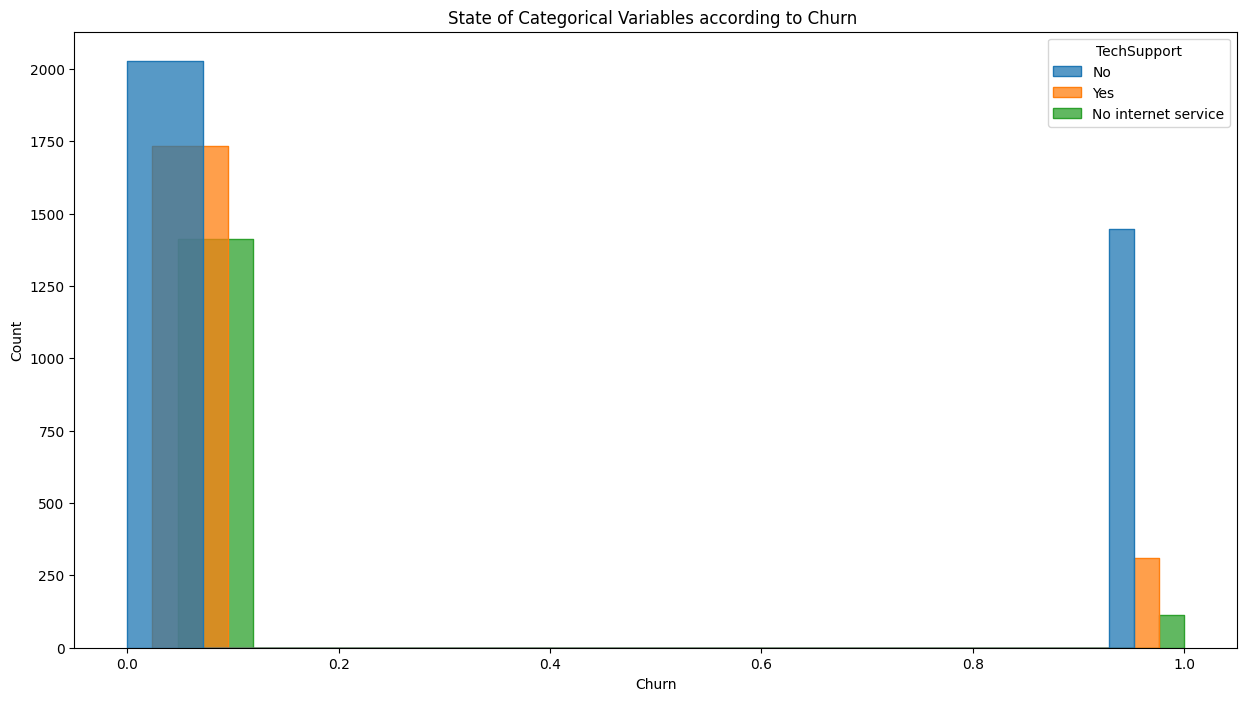

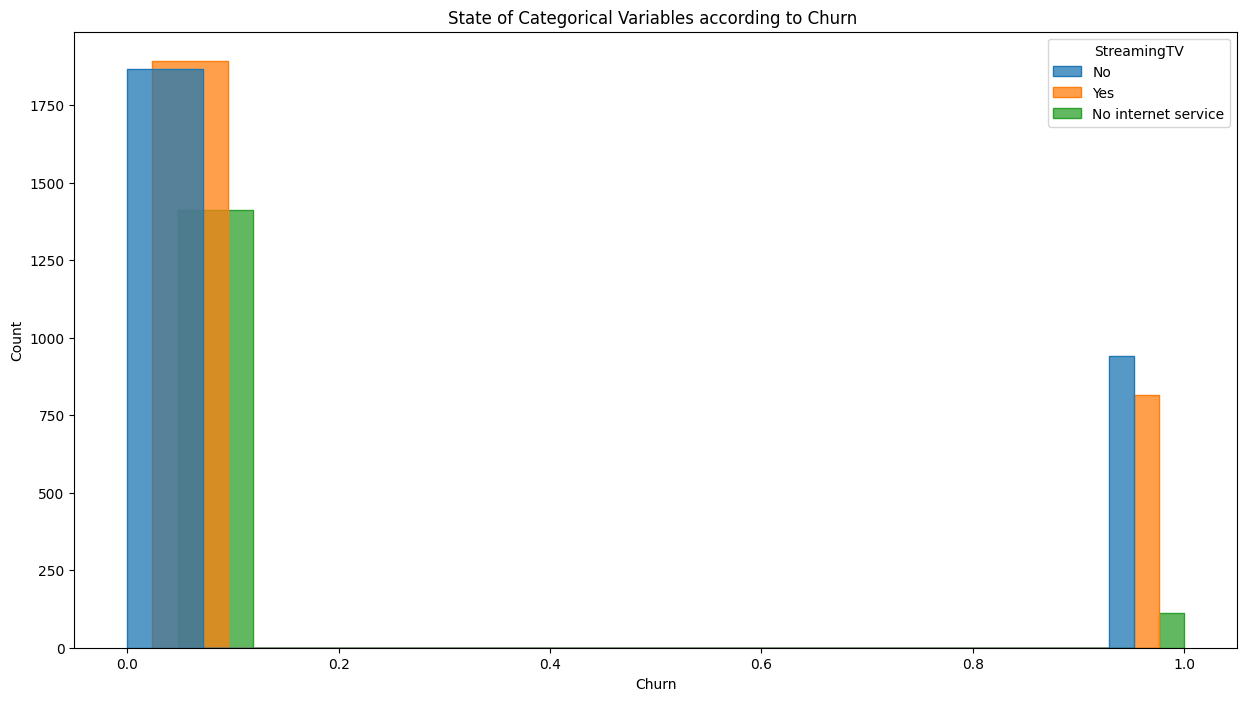

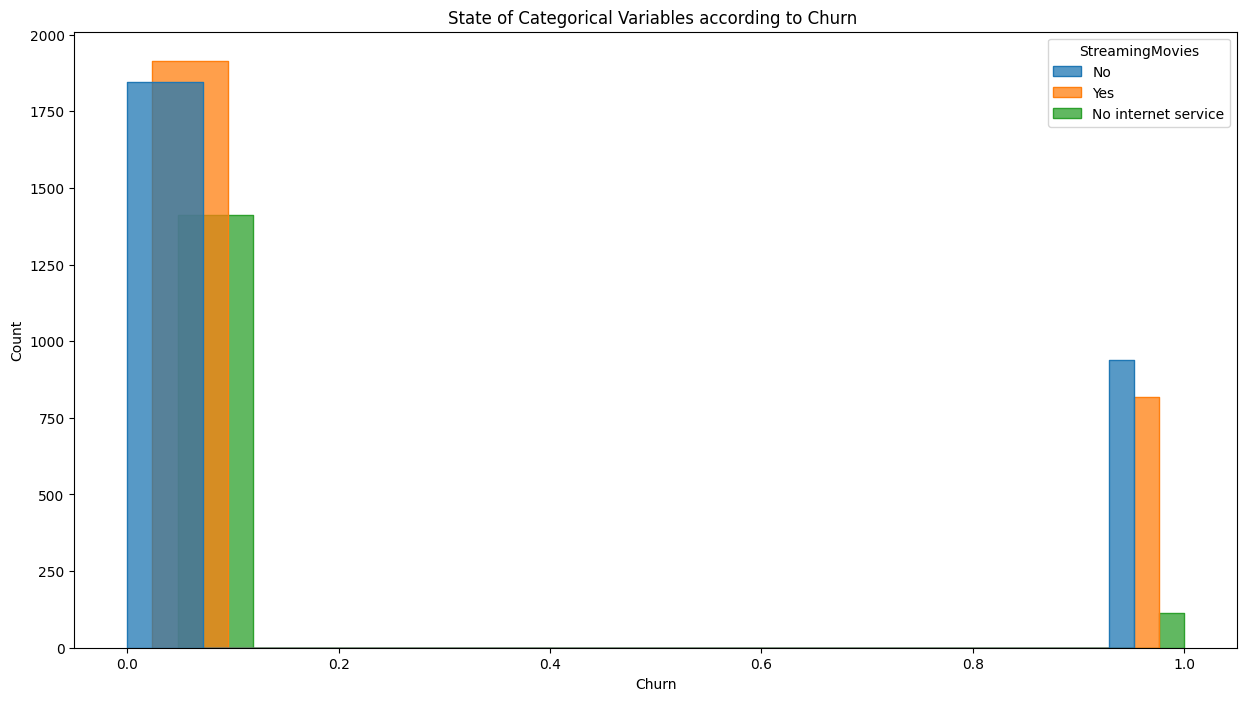

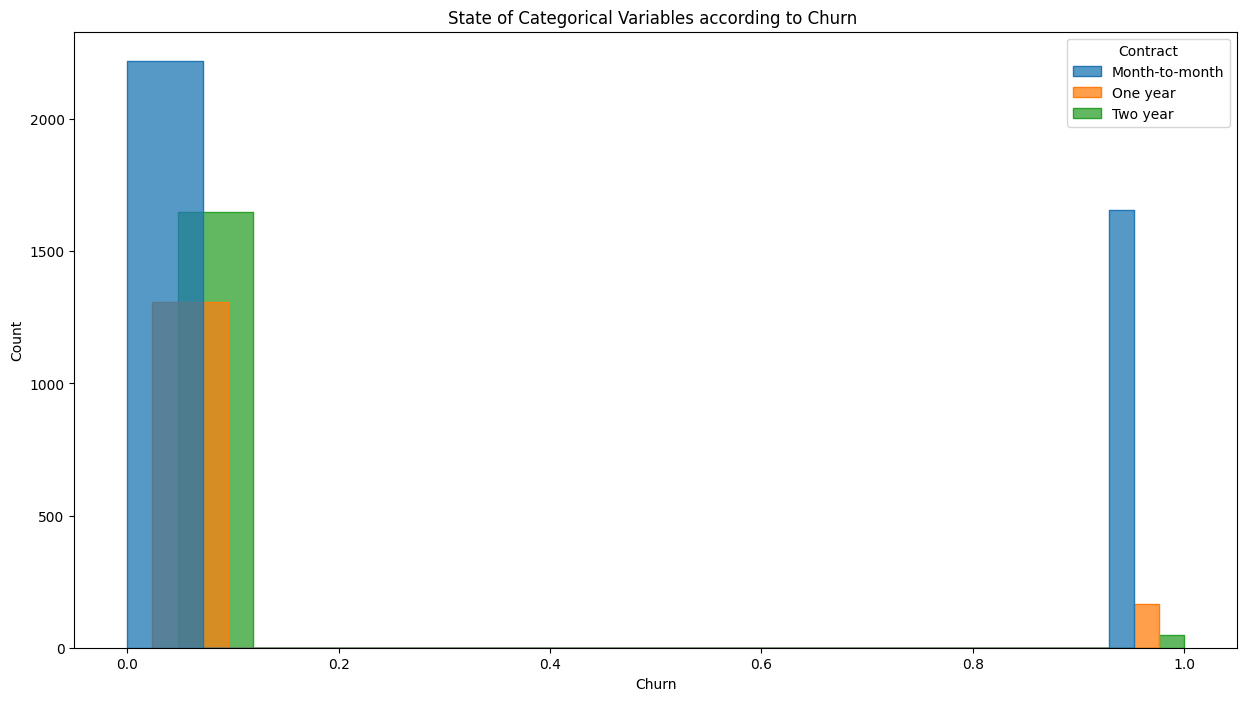

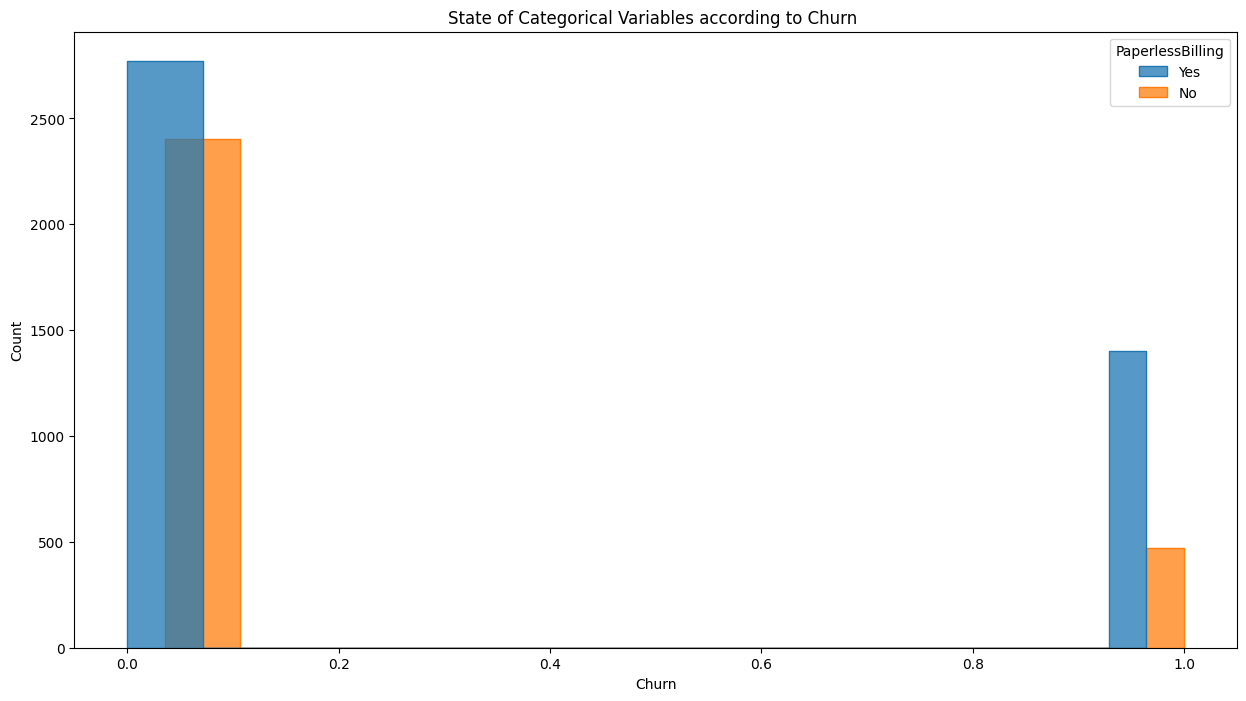

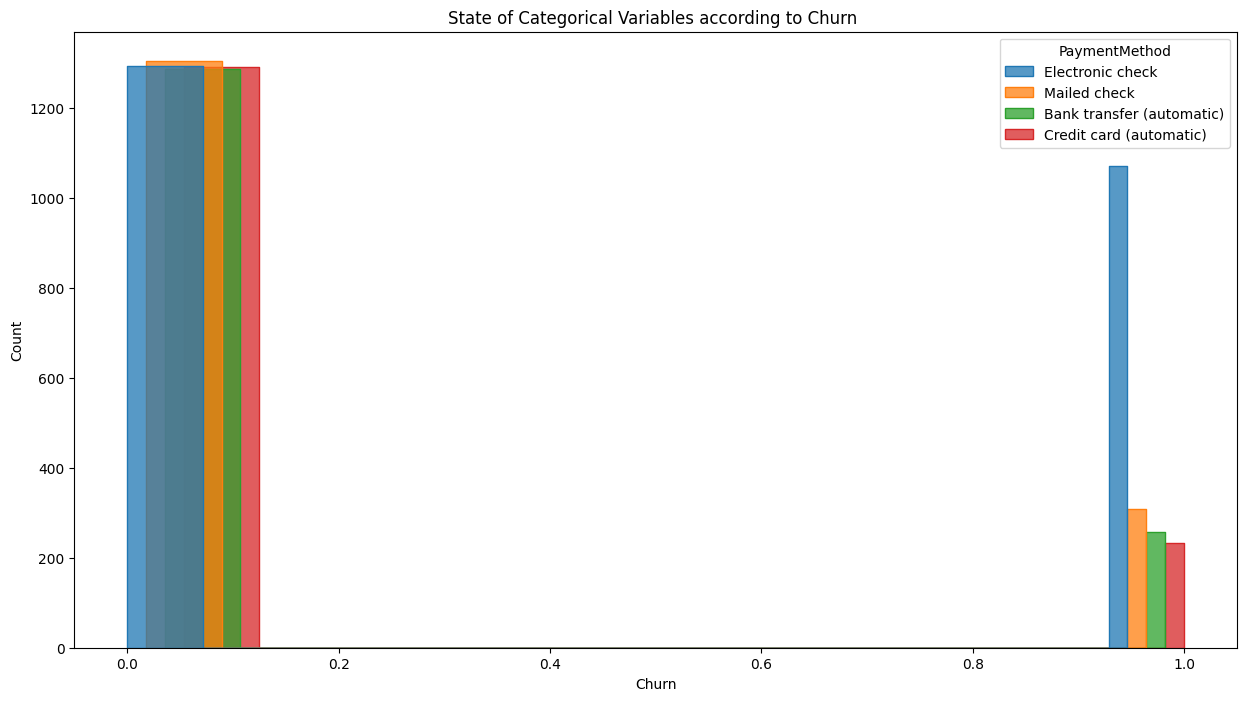

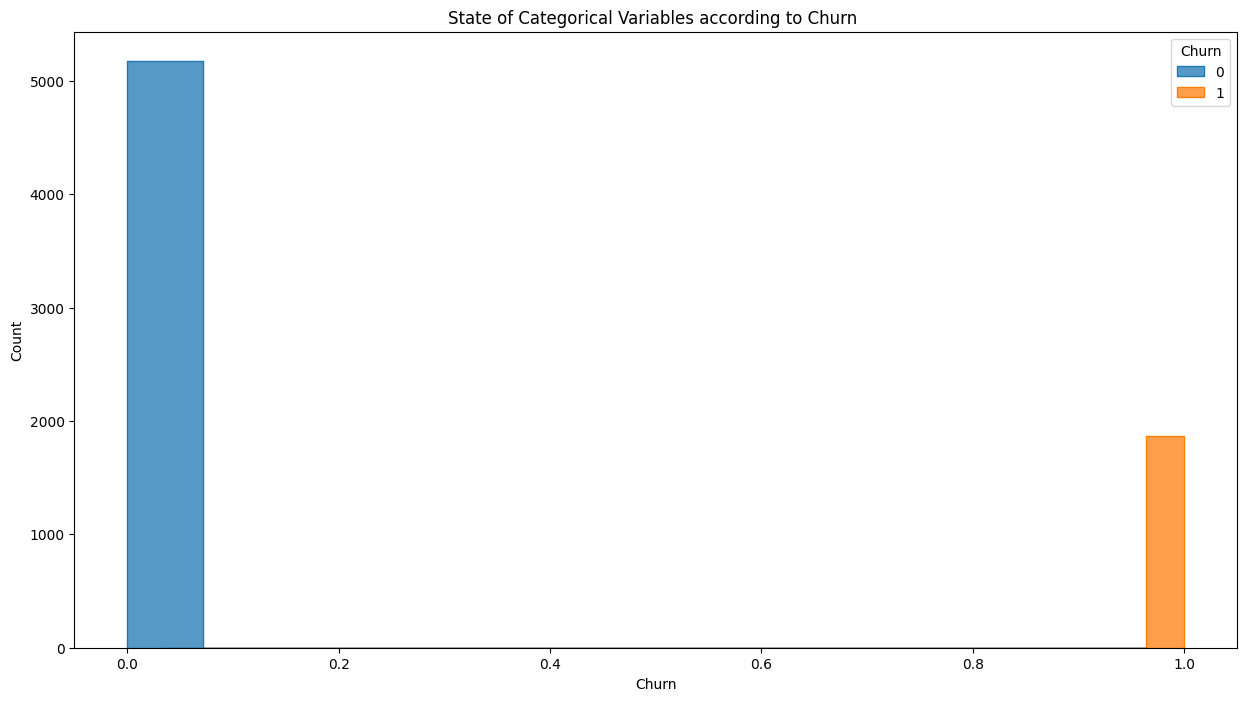

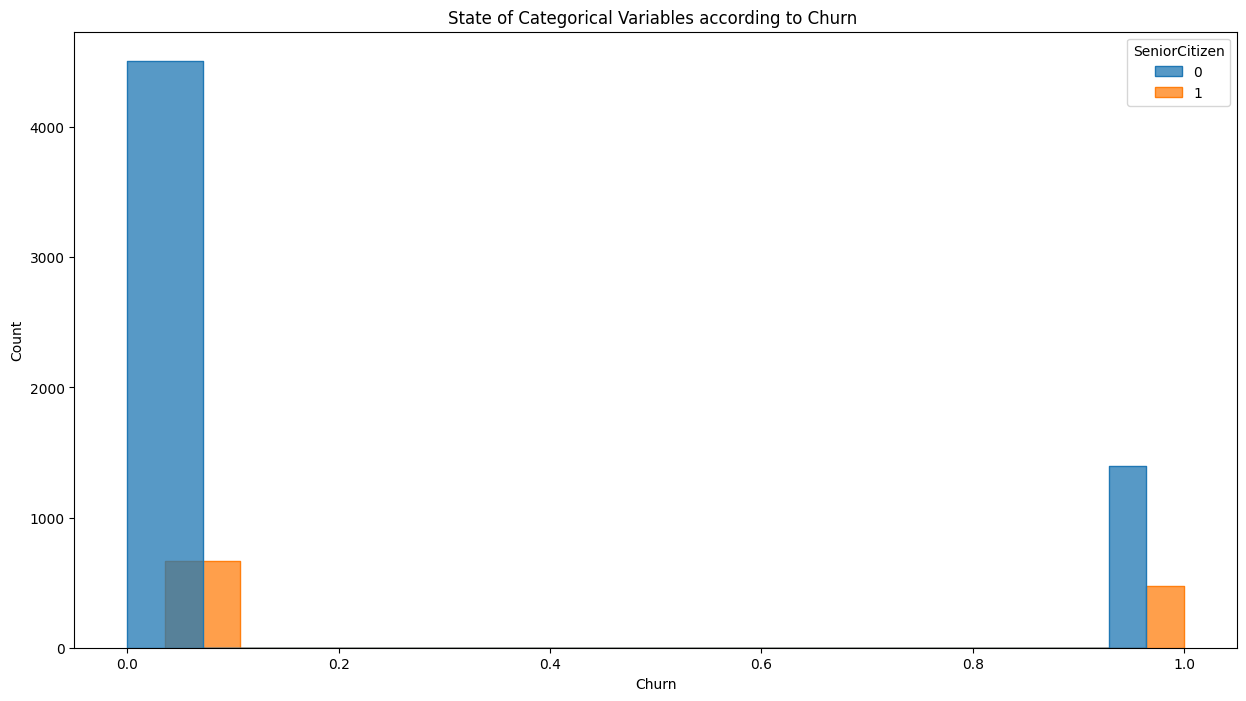

In [20]:
def target_vs_category_visual(dataframe,target, categorical_col):
    plt.figure(figsize=(15,8))
    sns.histplot(x=target,hue=categorical_col, data=dataframe,element="step",multiple="dodge")
    plt.title("State of Categorical Variables according to Churn ")
    plt.show()
    
def target_summary_with_cat(dataframe,target,categorical_col):
    print(pd.DataFrame({"CHURN_MEAN": dataframe.groupby(categorical_col)[target].mean()}))
    print(20*"-")


for col in cat_cols:
    target_vs_category_visual(df,"Churn",col)
    


### Yorumlar:

* Erkek ve kadın müşteriler için müşteri kaybı birbirine çok benzer!

* Aynı şekilde SeniorCitizens müşterilerinin sayısı da oldukça düşük! Bunun dışında, **SeniorCitizens müşterilerinde neredeyse %40'lık bir kayıp** gözlemleyebiliyoruz. 1142 SeniorCitizens müşterisinden toplam 476 müşteriye karşılık gelmektedir.

* Partner ile birlikte yaşayan müşteriler, Partner ile yaşamayanlara kıyasla **daha az kayıp** yaşadılar.

* Benzer şekilde, yanında bağımlısı(Dependents) olmayan müşteriler için de **kayıp oranı yüksek**!



* Telefon Hizmeti için, (telefon hizmeti olmamasına rağmen), hizmetleri bırakan müşteri sayısına kıyasla daha fazla müşteri elde tutuldu.


* Çoklu Hatlar durumunda, Çoklu Hatların mevcut olup olmadığı durumdaki kayıp oranı aynıdır.


* Çok sayıda müşteri internet hizmetinin sağlanmasında Fiber optik kabloların kullanılmasına karşı direnç göstermiştir. Tam tersine, yukarıdaki grafikte müşterilerin İnternet Hizmetleri için DSL kullanmayı tercih ettikleri görülüyor!


* StreamingTV ve StreamingMovies aynı grafiği görüntüler. StreamingTV ve StreamingMovies'e abone olup olmadıklarına bakılmaksızın birçok müşteri kaybedildi. 

* Müşterilere bir servisi söz konusu olduğunda, OnlineSecurity, OnlineBackup, DeviceProtection ve TechSupport hizmetleri yukarıdaki görselleştirmelerden çok önemlidir!


* Çok sayıda müşteri, yukarıda belirtilen özelliklere sahip hizmetlerin yetersiz olması durumunda servis sağlayıcısını değiştirmiştir.


* Aydan Aylık Sözleşmeye göre müşteri kaybı oldukça yüksektir. Bunun nedeni muhtemelen müşterilerin kendilerine sunulan çeşitli hizmetleri test etmeleri ve dolayısıyla paradan tasarruf etmek için 1 aylık hizmetin test edilmesidir!


* Diğer bir neden de internet hizmeti, yayın hizmeti ve telefon hizmetiyle ilgili genel deneyimin tutarlı olmaması olabilir. Her müşterinin farklı bir önceliği vardır ve bu nedenle 3 kişiden biri eşit düzeydeyse tüm hizmet kesilir!


* Kağıtsız Faturalama, çok sayıda müşterinin dağıldığını gösteriyor. Bunun nedeni muhtemelen bazı ödeme sorunları veya makbuz sorunlarıdır.


* Müşteriler Elektronik çek Ödeme Yöntemine açıkça kızdılar. Elektronik çek kullanılarak ödenen 2365 adet faturadan şaşırtıcı bir şekilde 1071 müşteri bu ödeme yöntemi sayesinde hizmet havuzundan çıktı. Şirketin kesinlikle düşmesi gerekiyor


* Elektronik çek yöntemini veya sorunsuz ve kullanıcı dostu hale getirin.

### Categorical Variables for Churn mean

In [21]:
for col in cat_cols:
    target_summary_with_cat(df,"Churn",col)

        CHURN_MEAN
gender            
Female    0.269209
Male      0.261603
--------------------
         CHURN_MEAN
Partner            
No         0.329580
Yes        0.196649
--------------------
            CHURN_MEAN
Dependents            
No            0.312791
Yes           0.154502
--------------------
              CHURN_MEAN
PhoneService            
No              0.249267
Yes             0.267096
--------------------
                  CHURN_MEAN
MultipleLines               
No                  0.250442
No phone service    0.249267
Yes                 0.286099
--------------------
                 CHURN_MEAN
InternetService            
DSL                0.189591
Fiber optic        0.418928
No                 0.074050
--------------------
                     CHURN_MEAN
OnlineSecurity                 
No                     0.417667
No internet service    0.074050
Yes                    0.146112
--------------------
                     CHURN_MEAN
OnlineBackup                

## Group 1 : Customer Information :
gender | SeniorCitizen | Partner | Dependents


In [22]:
gender = df[df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = df[df['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = df[df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = df[df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

C:\Users\shera\AppData\Local\Temp\ipykernel_12232\1242286239.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\1242286239.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\1242286239.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent 

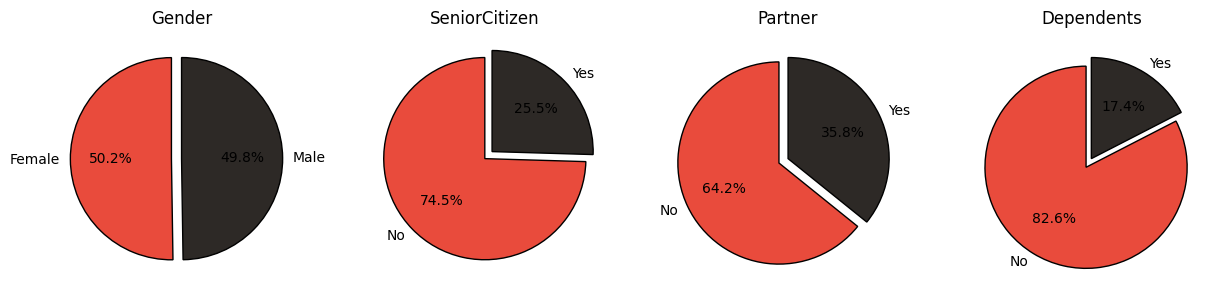

In [23]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

### Yorum

Hizmet değiştiren kadın ve erkek müşteriler arasında %50 - %50 oranında net bir ayrım gözlemliyoruz.
Bu nedenle, geçişin nedeni hizmetle veya müşterilerin kötü tepki verdiği bir süreçle ilgili bir şeydir!

Kaybolan müşterilerin %75'i SeniorCitizens(Kıdemli Vatandaş) değil! Bu, şirketin dikkatini başka yöne çekmesi gereken önemli bir bilgidir!

Tek başına yaşayan müşteriler hizmetleri kesmiş durumda. Partners & Dependents verilerine göre, ortaya çıkan müşterilerin ortalama %73,4'ü tek başına yaşıyordu.

## Group 2: Services Subscribed by the Customer :¶
PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies |¶


In [24]:
phoneservice = df[df['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = df[df['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = df[df['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = df[df['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = df[df['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes 

C:\Users\shera\AppData\Local\Temp\ipykernel_12232\4142344993.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\4142344993.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\4142344993.py:8: FutureWarning: Series.__getitem__ tre

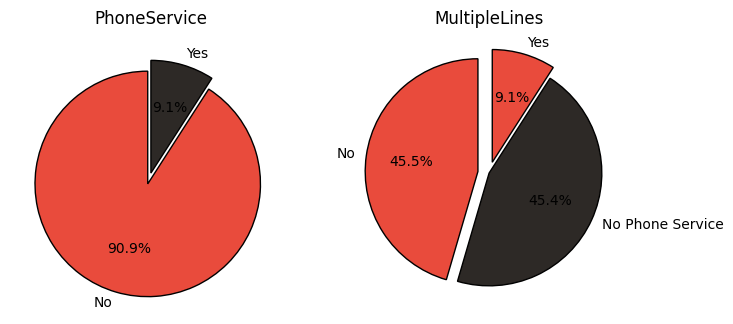

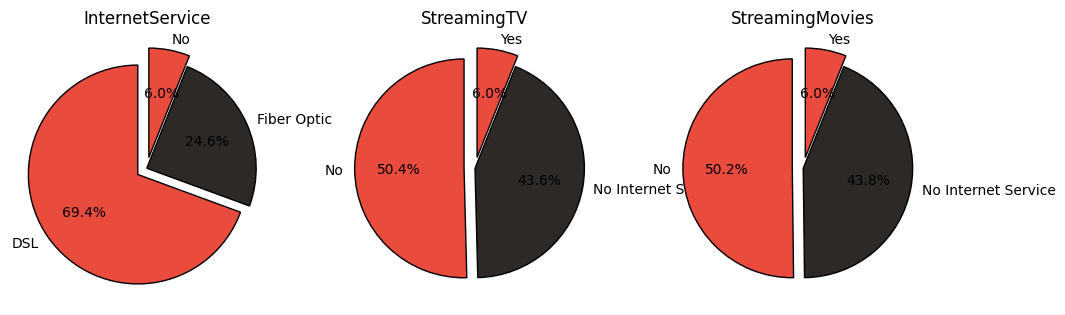

In [25]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService');

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines');

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService');

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV');

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies');


* Telefon Hizmeti sağlamasına rağmen müşterilerin büyük bir yüzdesi telefon hizmetini değiştirdi!

* Benzer şekilde, müşteri aboneliği iptali ne olursa olsun gerçekleştirildiğinden MultipleLines'ın kullanılabilirliği de önemli değildi!

* Müşteriler, Fiber Optik kabloların InternetService'i hizmetlerden %70'lik kesin bir vazgeçme oranıyla sağlama yaklaşımını kesinlikle takdir etmediler!

* StreamingTV ve StreamingMovies için bu hizmetlere sahip olmayan müşteriler aboneliklerini kesinlikle iptal etti, ancak müşterilerin ortalama %43,7'si akış içeriğini tüketmelerine rağmen aboneliklerini değiştirdi.

## Group 2: Services Subscribed by the Customer
OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport 


In [26]:
onlinesecurity = df[df['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup = df[df['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = df[df['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = df[df['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

C:\Users\shera\AppData\Local\Temp\ipykernel_12232\1833915323.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\1833915323.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes
C:\Users\shera\AppData\Local\T

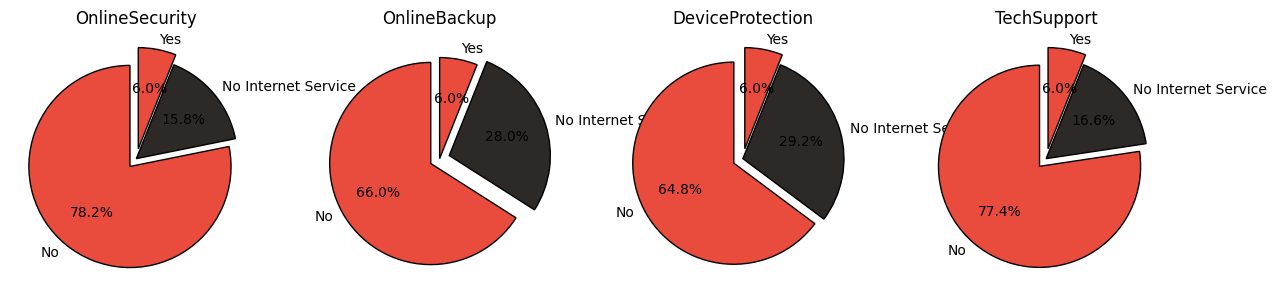

In [27]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity');

plt.subplot(1,4,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup');

plt.subplot(1,4,3)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection');

plt.subplot(1,4,4)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport');

Yukarıdaki pasta grafikleri OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport sağlamanın önemini vurguluyor, çünkü müşterilerin ortalama %71,6'sı bu özelliklerin eksikliği nedeniyle hizmetlerini kesiyor!

## Group 3 : Contract | PaperlessBilling | PaymentMethod |¶


In [28]:
contract = df[df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = df[df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = df[df['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 

C:\Users\shera\AppData\Local\Temp\ipykernel_12232\2912437916.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\2912437916.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes
C:\Users\shera\AppData\Local\Temp\ipykernel_12232\2912437916.py:8: FutureWarning: Series.__getitem__ treating 

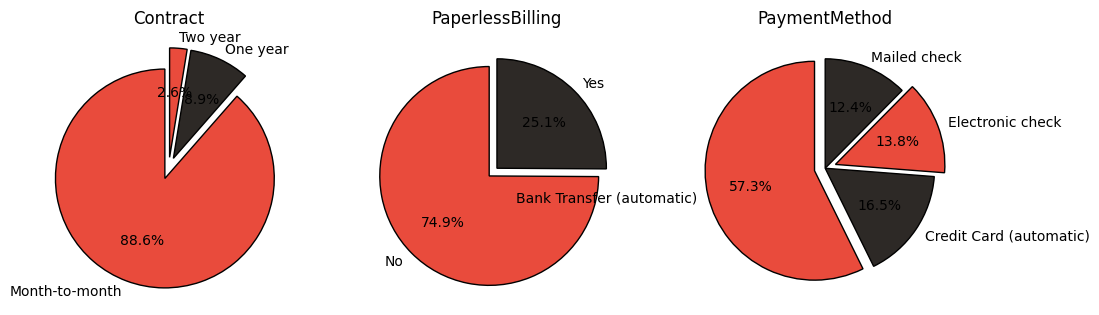

In [29]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),colors = colors,
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

### Comment

* Aydan Aya Sözleşme süresi, %88,6'lık devasa bir müşteri kaybı söz konusu olduğunda baskın paya sahip!

* Kağıtsız Faturalandırma müşteriler tarafından beğenilmiyor gibi görünüyor!

* Elektronik çek, kaybın %57,3'ünü oluşturduğu için mutlaka ayıklanması gerekiyor. Bunu Postayla Çek, Banka Havalesi (otomatik) ve Kredi Kartı (otomatik) takip eder!

### Numerical Variables vs Target Variable(Churn)

In [30]:
def target_summary_with_num(dataframe,target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col:"mean"}), end="\n\n")
    print("###################################")
    

for col in num_cols:
    target_summary_with_num(df,"Churn",col)

          tenure
Churn           
0      37.569965
1      17.979133

###################################
       MonthlyCharges
Churn                
0           61.265124
1           74.441332

###################################
       TotalCharges
Churn              
0       2549.911442
1       1531.796094

###################################


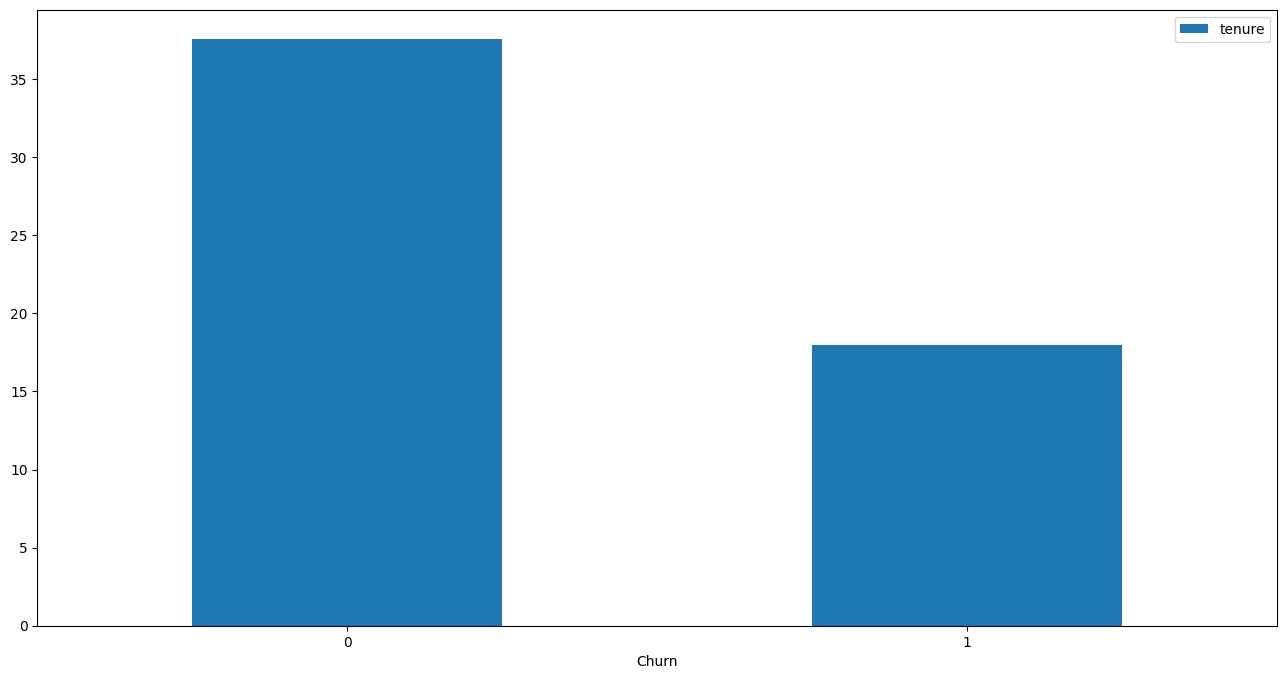

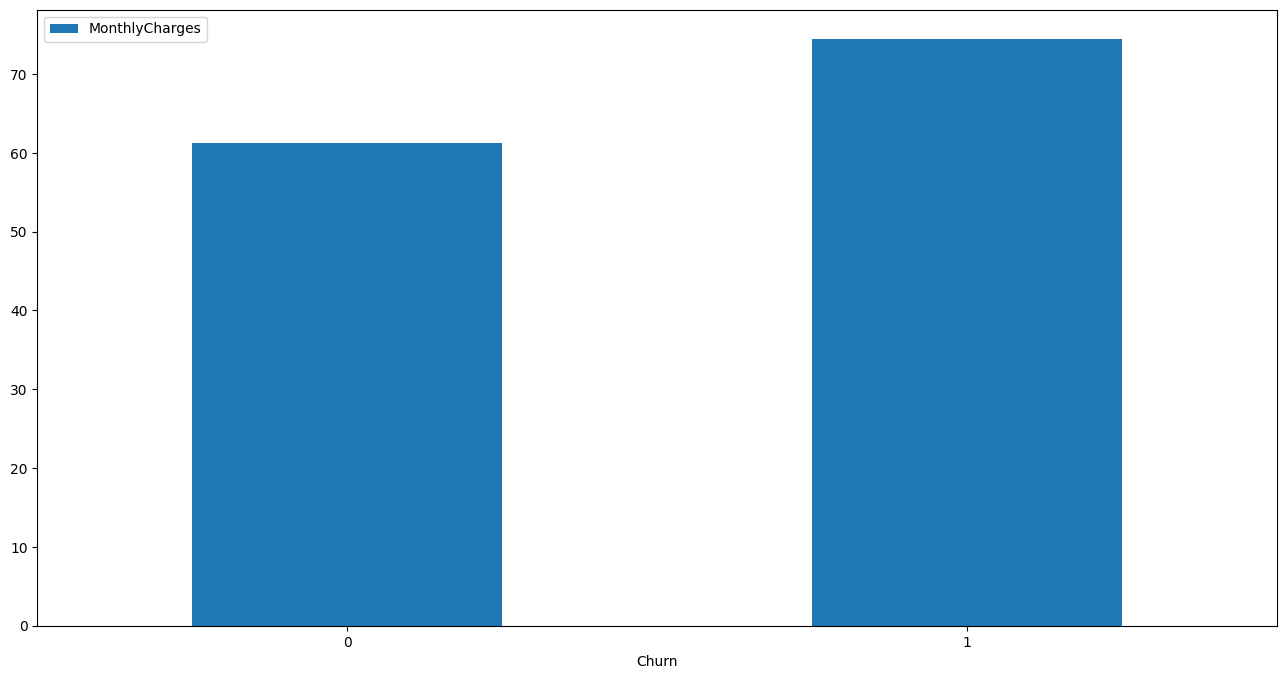

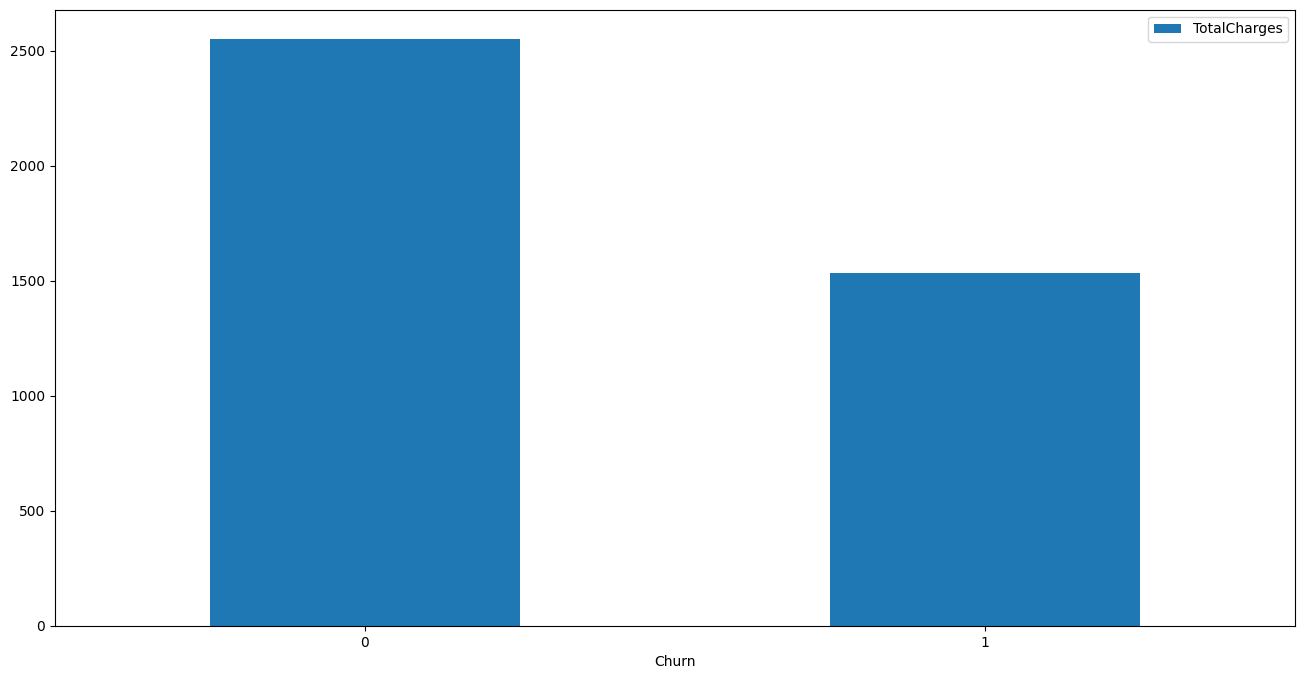

In [31]:
for col in num_cols:
    df.groupby('Churn').agg({col:'mean'}).plot(kind='bar', rot = 0,figsize=(16,8))

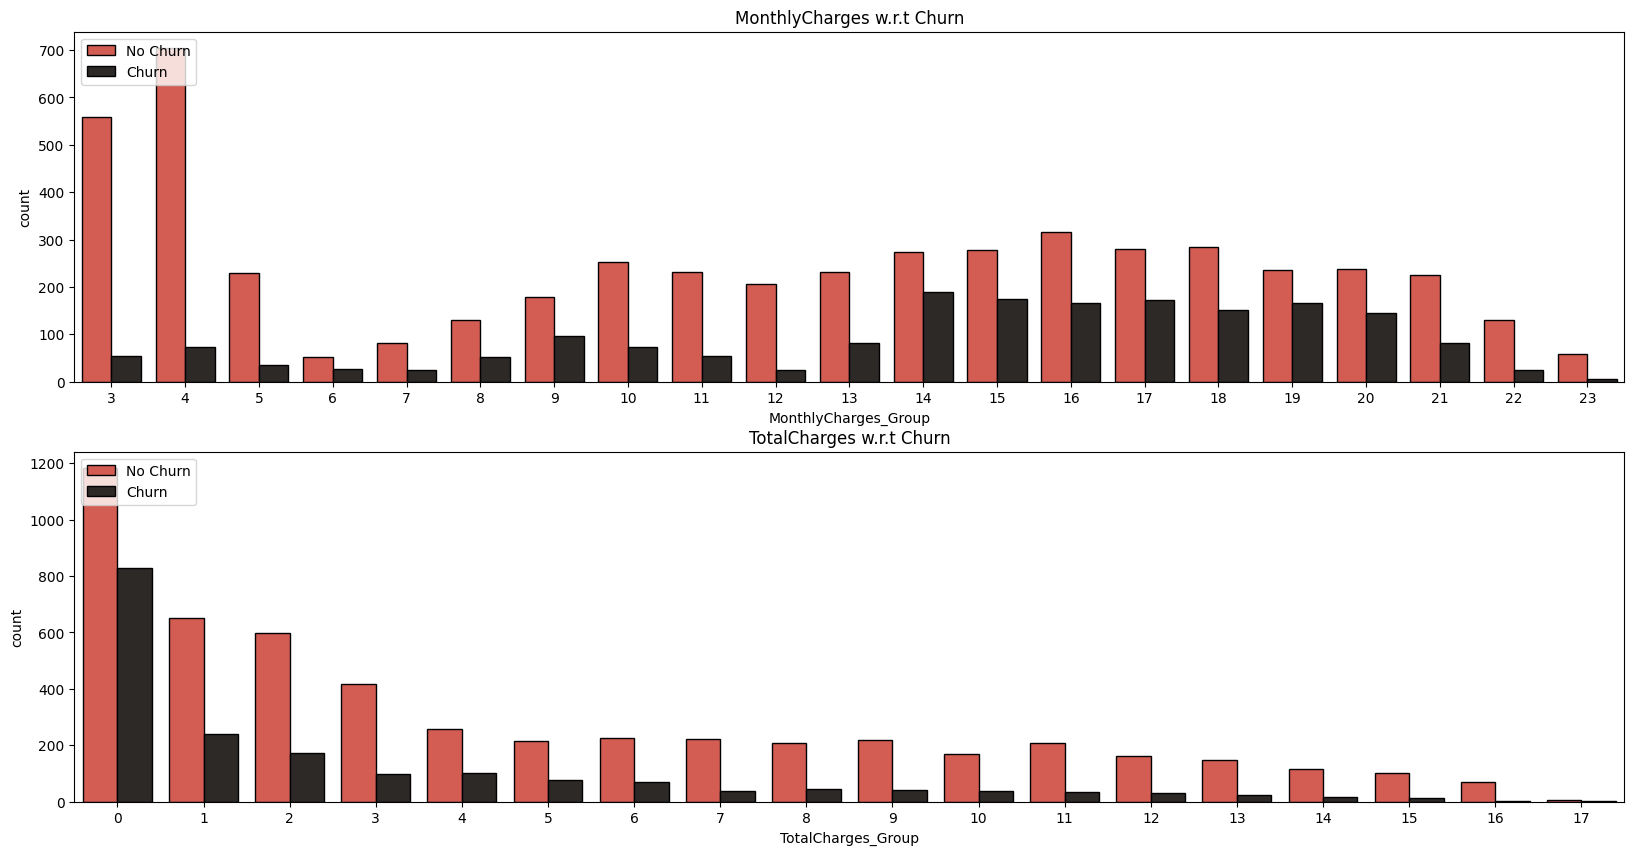

In [32]:
df['MonthlyCharges_Group'] = [int(i / 5) for i in df['MonthlyCharges']]
df['TotalCharges_Group'] = [int(i / 500) for i in df['TotalCharges']]

fig, ax = plt.subplots(nrows = 2,ncols = 1,figsize = (20,10))
for i in range(len(num_cols[1:])):
    plt.subplot(2,1,i+1)
    sns.countplot(x = num_cols[1 + i]+'_Group',data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    plt.legend(['No Churn','Churn'],loc = 'upper left')
    title = num_cols[1 + i] + ' w.r.t Churn'
    plt.title(title);

### Yorum

* MonthlyCharges grubu için 65 (13x5) - 105 (21x5) arası değerlerde kayıp oranı yüksektir. Bu MonthlyCharges değer aralığı müşterilerin geçiş yapmasına neden oldu.

* Çok yüksek sayıda müşteri, 500'ün altındaki TotalCharges için hizmetlerden vazgeçti

## Numerical features vs Categorical features w.r.t Target variable (Churn)


In [33]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Customer Information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed Up for!
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Payment Information

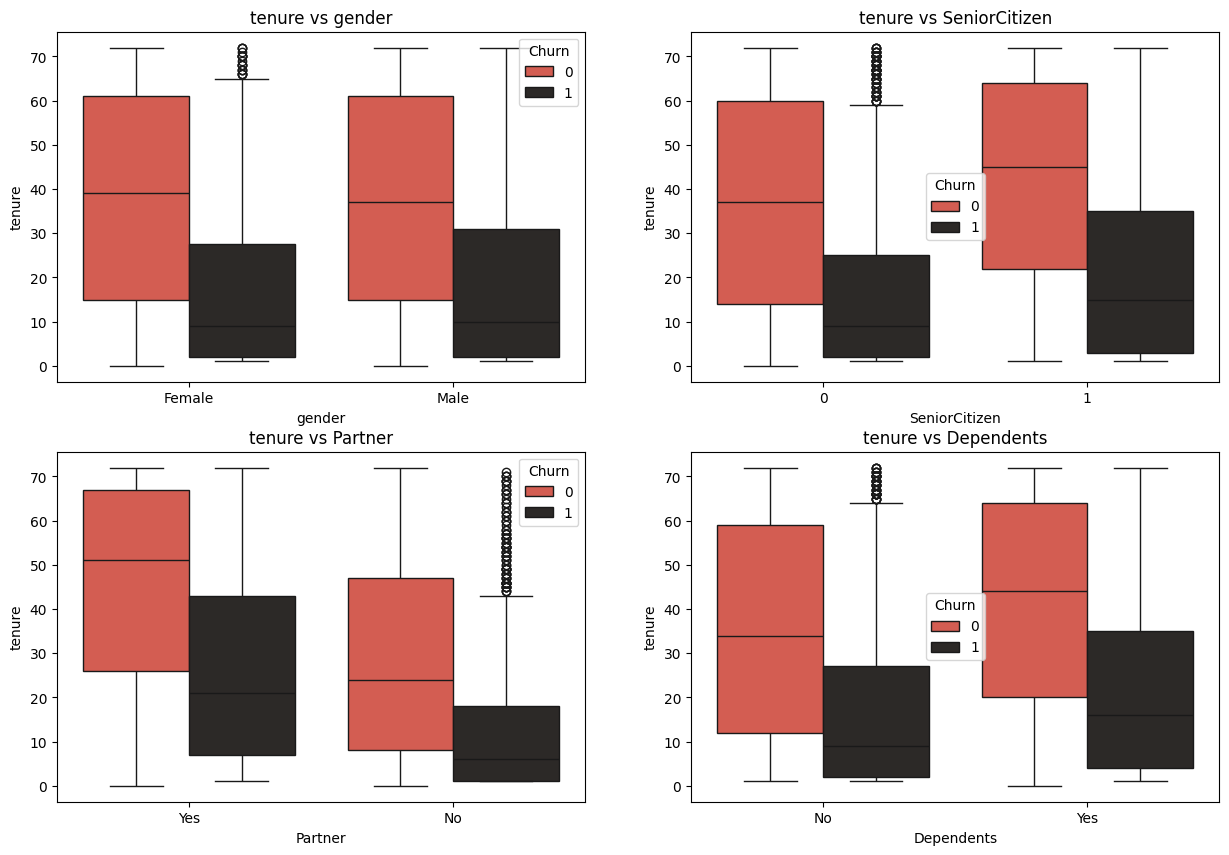

In [34]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l1[i]);
    
    

## Yorumlar

* Erkek ve Kadın müşteri kaybı grafikleri birbirine çok benzer.

* SeniorCitizen, 0 - 35 ay arası kullanım süresi değerleri için hizmetlerden vazgeçmiştir. 20 - 35 ay, SeniorCitizen devam etme veya geçiş yapma konusunda bir tür karar verme dönemidir.

* Benzer şekilde iş ortakları olan müşteriler de hizmeti 5 ila 45 ay süreyle kullanmaya devam etti.

### tenure vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies 

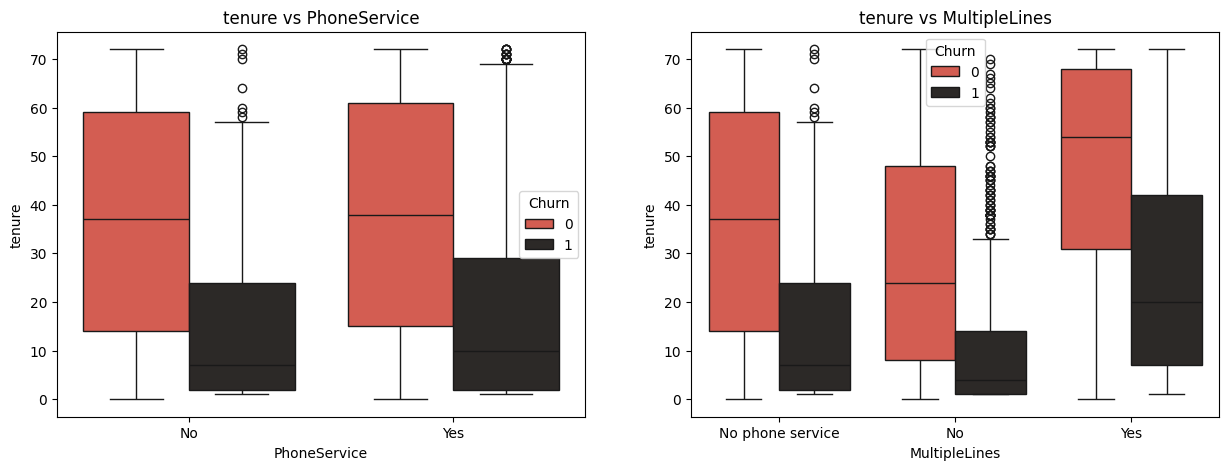

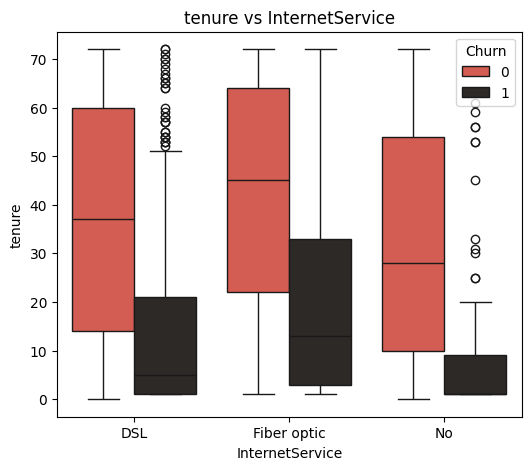

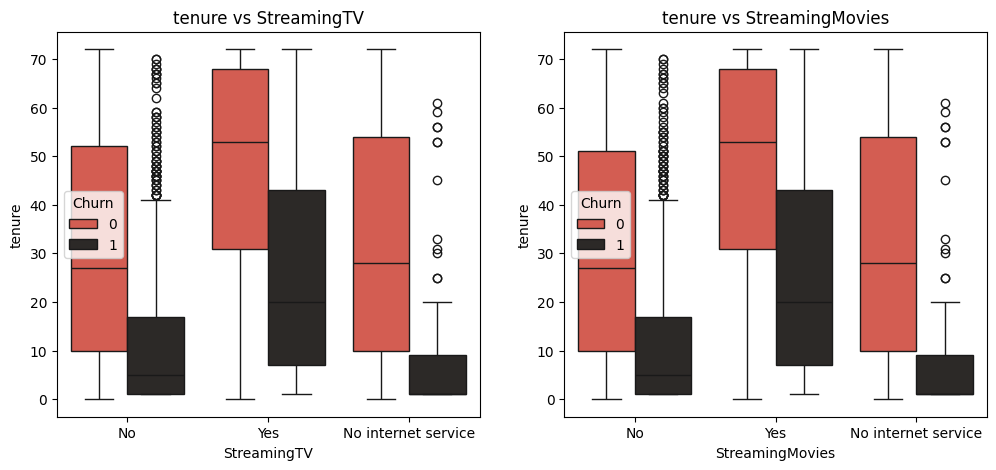

In [35]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'tenure',data = df,hue = 'Churn',palette = colors);
plt.title('tenure vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i + 3]);

### Yorumlar

* MutipleLines'ın varlığı, müşterilerin hizmetlerden vazgeçip vazgeçmemesine bakılmaksızın ortalama Aylık Ücretleri zorlar.

* Kullanım süresi ve PhoneService grafiği için, PhoneService'in kullanılabilirliği veya yansıtılmaması görselleri. Müşteriler muhtemelen yoğun telefon (arama - mesaj) kullanıcısı değildi.

* InternetService için, karışıklık yaklaşık 30 - 35 ay sürdüğü için müşteriler Fiber Optik kabloların kullanımı konusunda oldukça şüpheci görünüyorlar, ardından kabloyu ileriye taşımadan ya da yeni bir kabloya geçmeden önce!

* StreamingTV ve StreamingMovies'e benzer şekilde, yaklaşık 10 - 40 aylık bir kullanım dışı kalma süresi gözlemlenebilir!

### tenure vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport


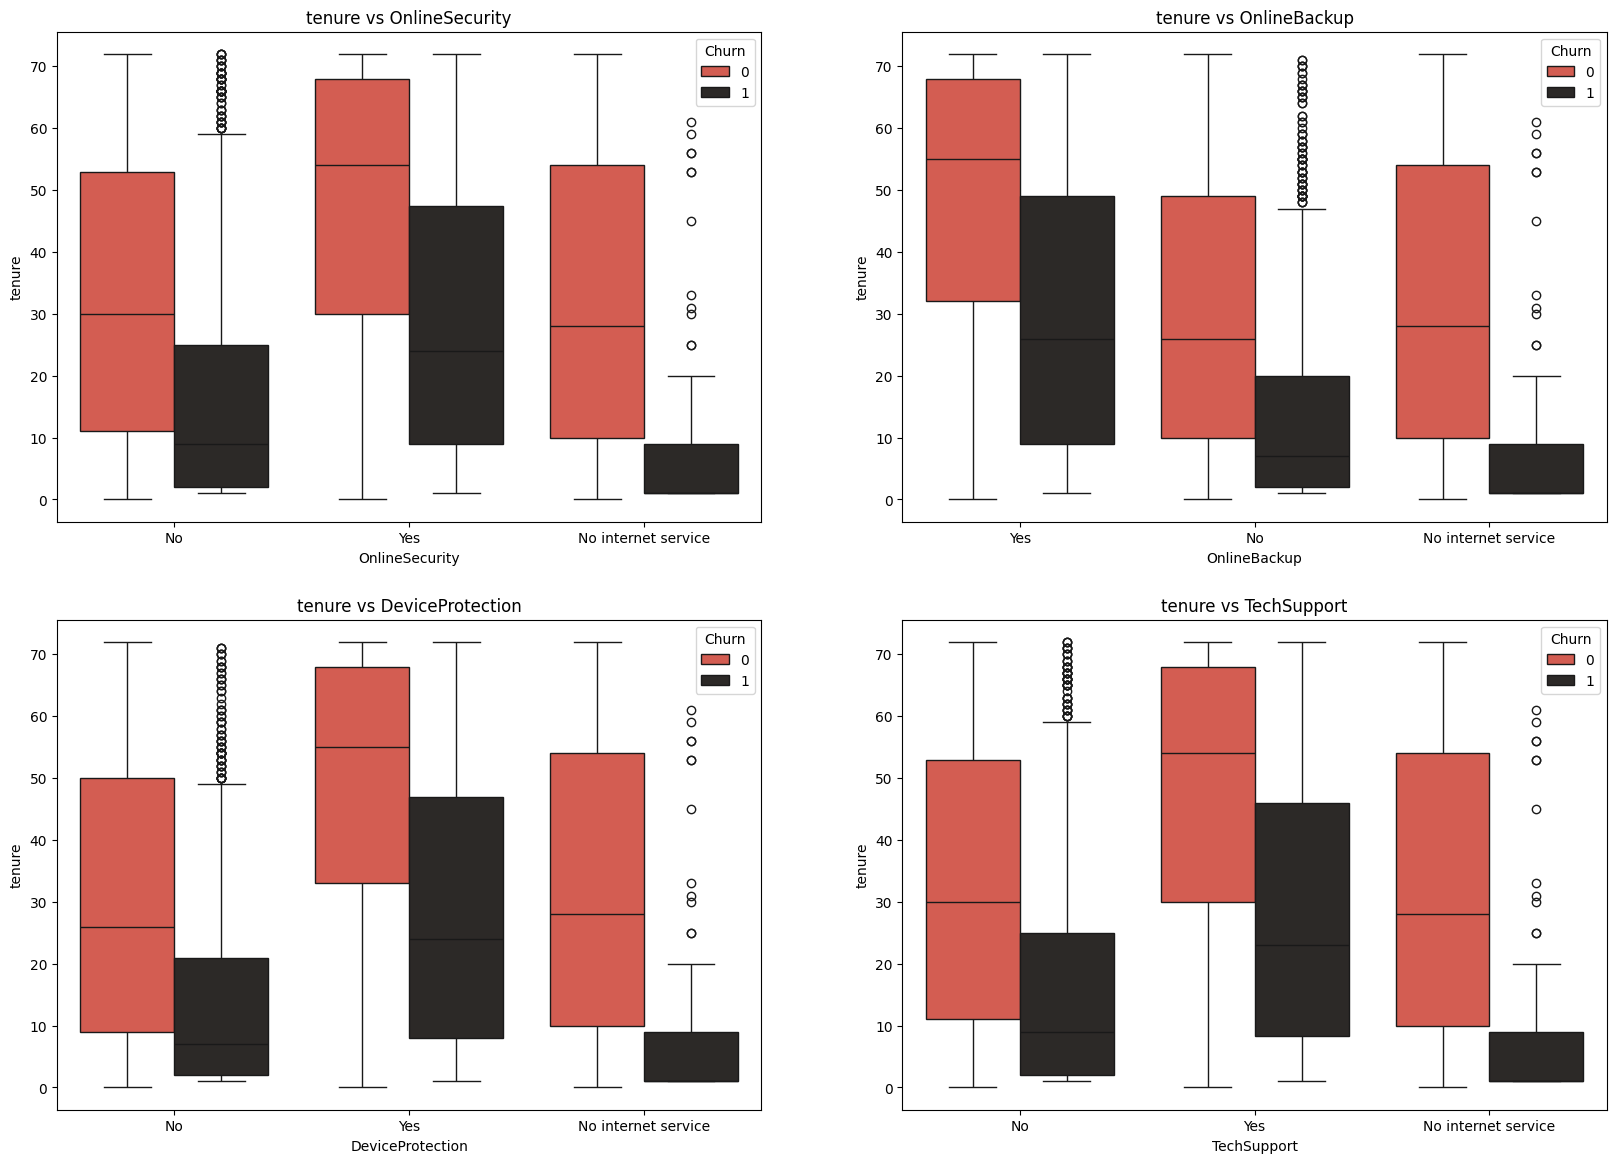

In [36]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l2[i-4]);

### Yorumlar

OnlineSecurity, OnlineBackup, DeviceProtection ve TechSupport için ortalama kayıp kullanım süresi değeri 25 aydır. Bu kayıp süresinin en yüksek değeri yaklaşık 45 aydır.

30 - 35 aylık dönem, müşterilerin mevcut hizmetlere devam mı edecekleri yoksa yukarıdaki özelliklere mi geçecekleri konusunda bir telefon görüşmesi yaptıkları dönemdir!

## tenure vs Group 3 : Contract | PaperlessBilling | PaymentMethod |¶


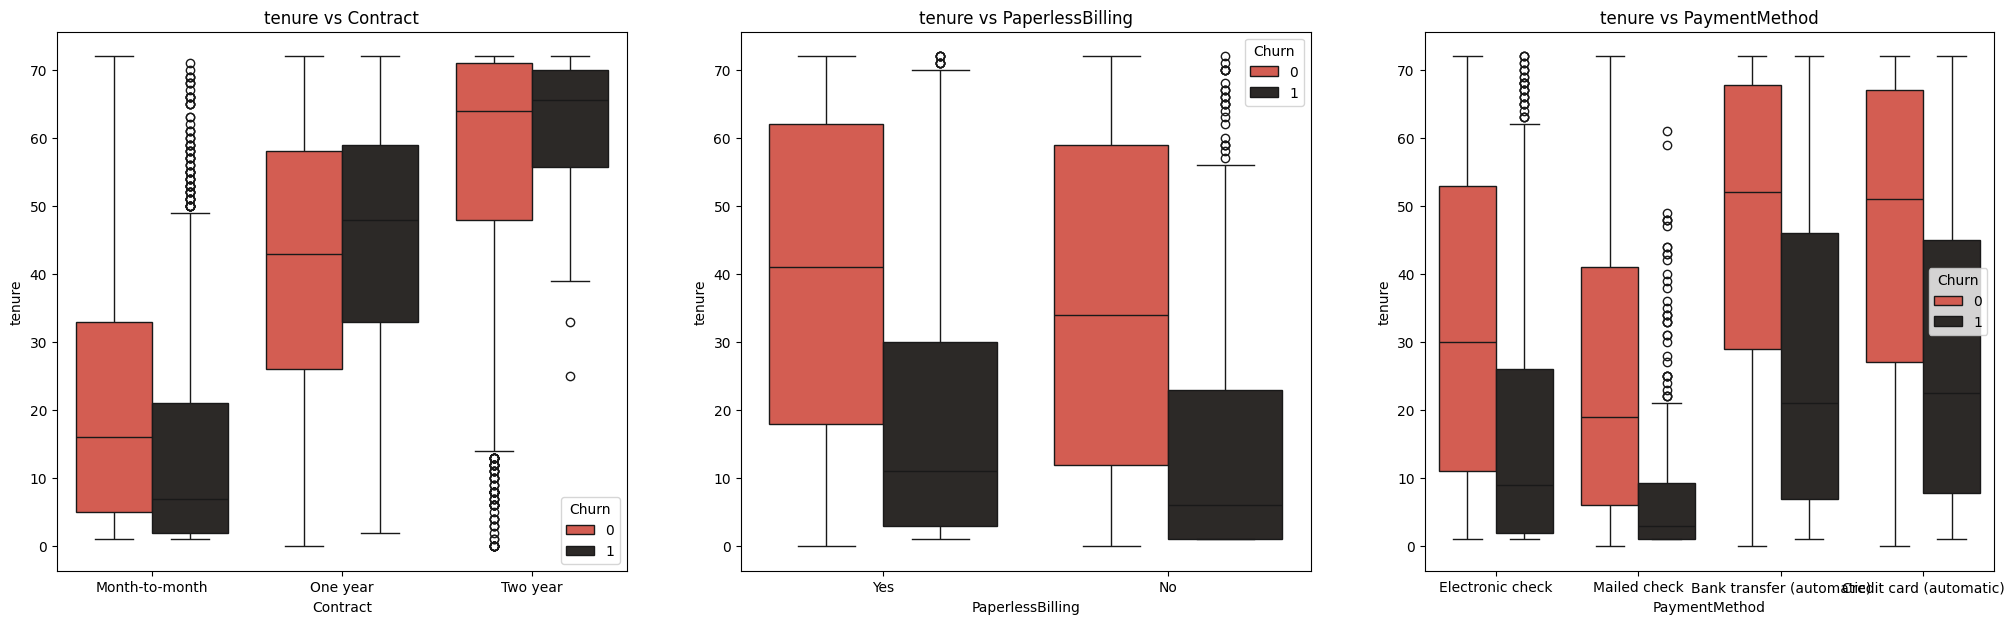

In [37]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    plt.title('tenure vs ' + l3[i]);

### Yorumlar

* Müşteriler hizmetler için Bir yıllık ve İki yıllık sözleşmeler imzaladıklarında, hizmetleri sırasıyla yaklaşık 25 ve 45 ay boyunca devam ettirecek gibi görünüyorlar! Ancak hizmetleri sorgulamaya başlıyorlar ve sırasıyla 35 ay ve 55 ay sınırından geçiş yapmayı düşünüyorlar!

* Kağıtsız Faturalandırmadan bağımsız olarak müşteriler 1. aydan itibaren geçiş yapmayı düşünüyor.

* Ödeme Yöntemi söz konusu olduğunda, Banka Havalesi (otomatik) ve Kredi Kartının (otomatik) ortalama kayıp vadesi, 20 ayın üzerinde, Elektronik çek ve Posta çekinin neredeyse iki katıdır (sırasıyla yaklaşık 10 ay ve yaklaşık 5 ay).

## MonthlyCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents


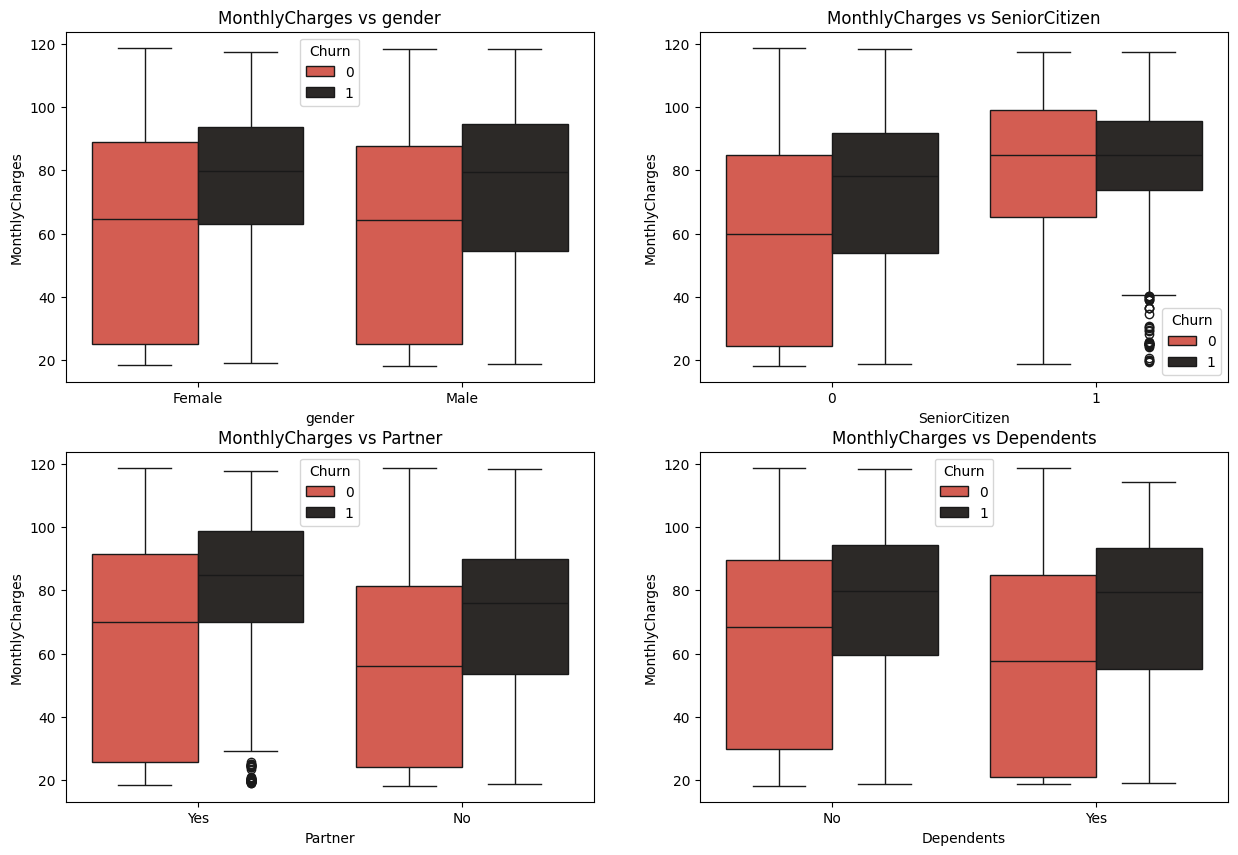

In [38]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors); 
    plt.title('MonthlyCharges vs ' + l1[i]);

### Yorumlar


* Yukarıda belirtilen tüm özellikler için, kaybetmeyen müşterilerin medyan değeri, kaybetmeyen müşterilerin alt sınırına çok yakındır.

* Erkek ve Kadın müşterilerin ortalama Aylık Ücretleri 60 civarındadır. Kıdemli Vatandaşlar için bu değer 80'e çıkarılmıştır.

* Partner ile birlikte yaşayan müşterilerin, tek başına yaşayanlara göre daha yüksek bir alt abone kaybı limiti (MontlyCharges) 70'tir; MonthlyCharges 60'ın biraz altındadır!

### MonthlyCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies


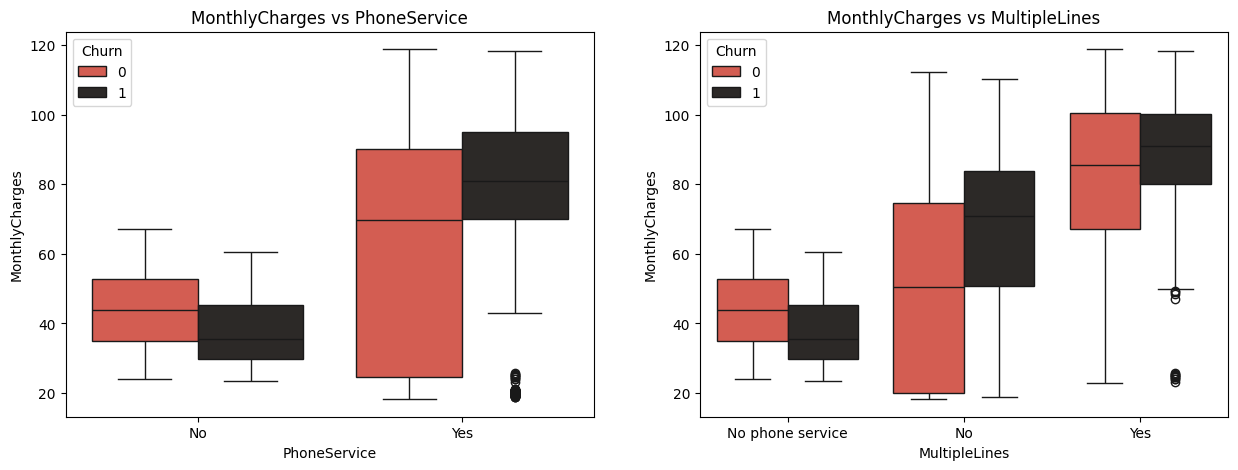

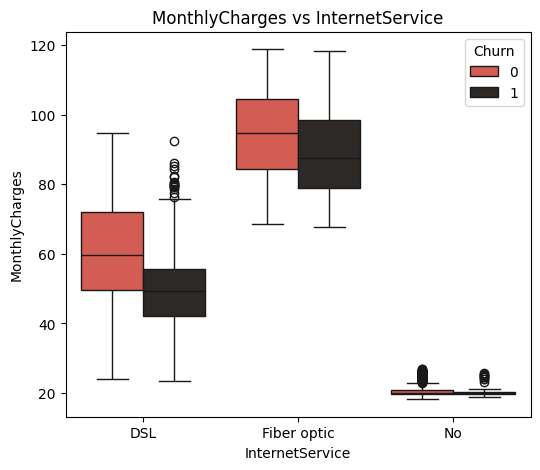

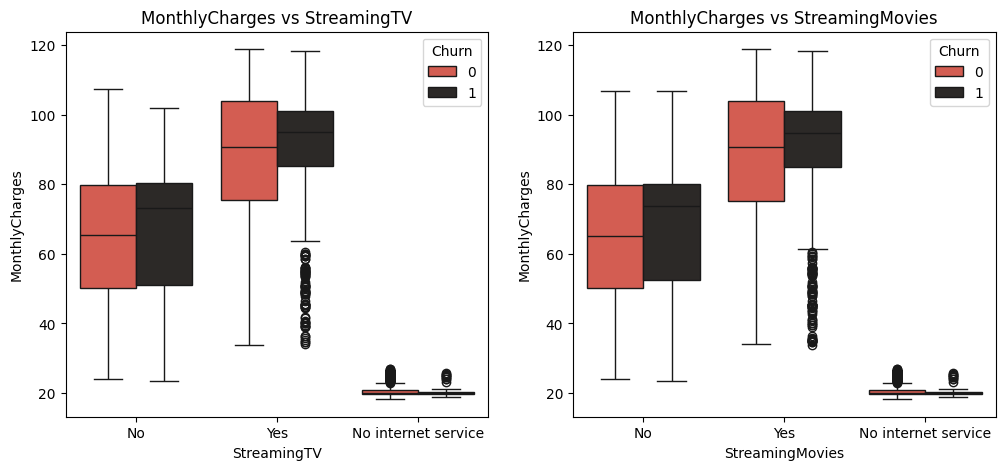

In [39]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
plt.title('MonthlyCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i + 3]);

## Yorumlar

* Fiber Optik kabloların aylık ücretleri çok yüksektir. Bu kadar yüksek müşteri kaybının nedeni bu olabilir.

* Benzer şekilde StreamingTV ve StreamingMovies'in Aylık Ücretleri de oldukça yüksektir.

* PhoneService için MonthlyCharges aralığı 25 - 85 arasındadır ancak müşteriler MonthlyCharges'ın 75 değerinden abonelikten çıkmayı düşünürler.

## MonthlyCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport

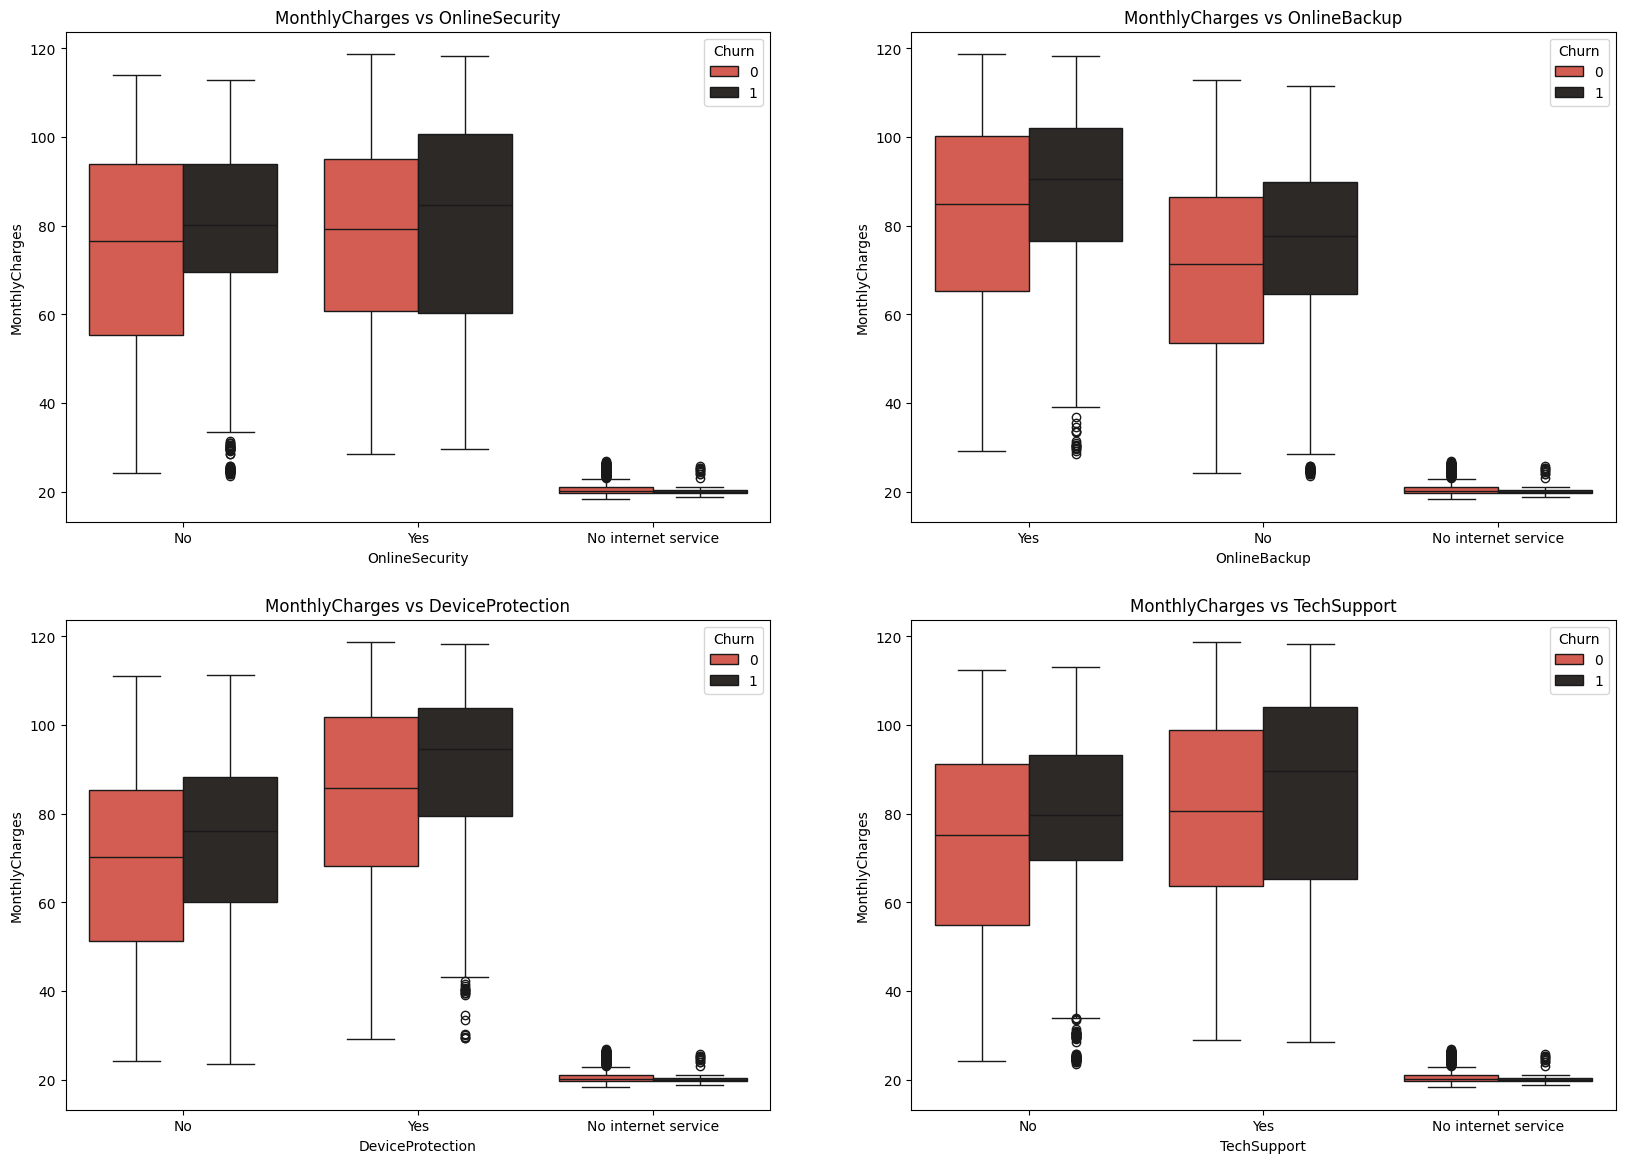

In [40]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('MonthlyCharges vs ' + l2[i-4]);

## Yorumlar

* OnlineSecurity, OnlineBackup, DeviceProtection ve TechSupport için değer aralığı yaklaşık 50 ila 100 arasındadır.

* Bu hizmetlere abone olan müşteriler, muhtemelen MonthlyCharges nedeniyle aboneliğini iptal etmeyi düşünmüyorlar çünkü abonelikten çıkıp devam eden müşterilerin değer aralığı hemen hemen aynı!

### MonthlyCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod 

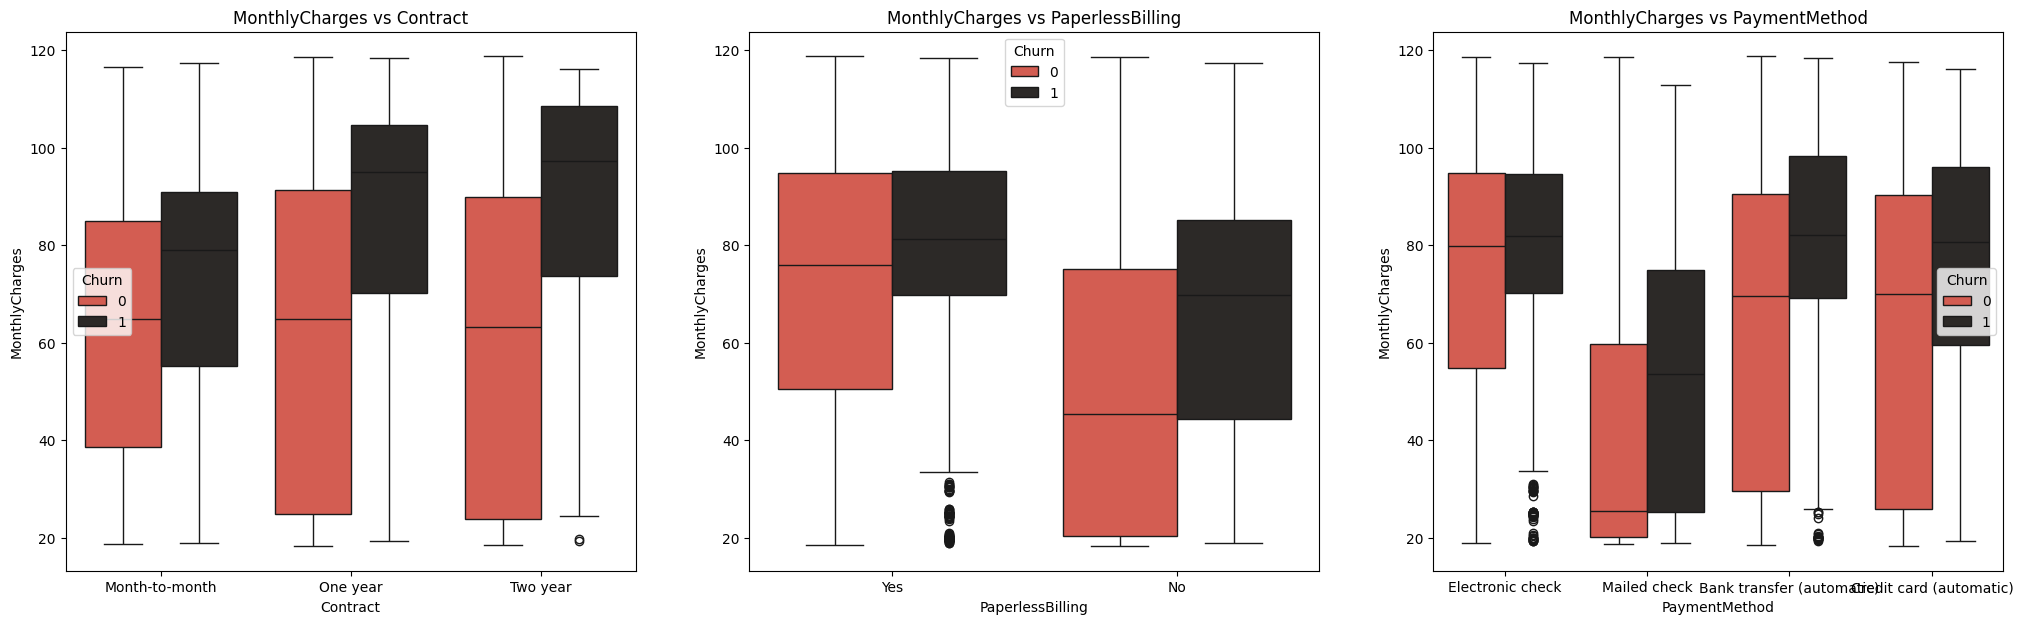

In [41]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'MonthlyCharges',data = df,hue = 'Churn',palette = colors);
    title = 'MonthlyCharges vs ' + l3[i]
    plt.title(title);

### Comments

* Aylık Ücretlerin alt limiti Aydan Aya sözleşme için Bir yıllık ve İki yıllık sözleşmelerden daha yüksektir. Ancak Aylık sözleşmelerde hizmeti bırakan müşterilerin alt limiti daha düşüktür.

* Elektronik çekin alt limiti çok yüksektir ve müşterilerin onu kullanmaktan vazgeçmesine neden olabilecek çok büyük bir faktör olabilir!

* Posta çeki ise ayrılan ve devam eden müşterilerin en düşük başlangıç değerlerine sahiptir.

## TotalCharges vs Group 1 : Customer Information : gender | SeniorCitizen | Partner | Dependents 

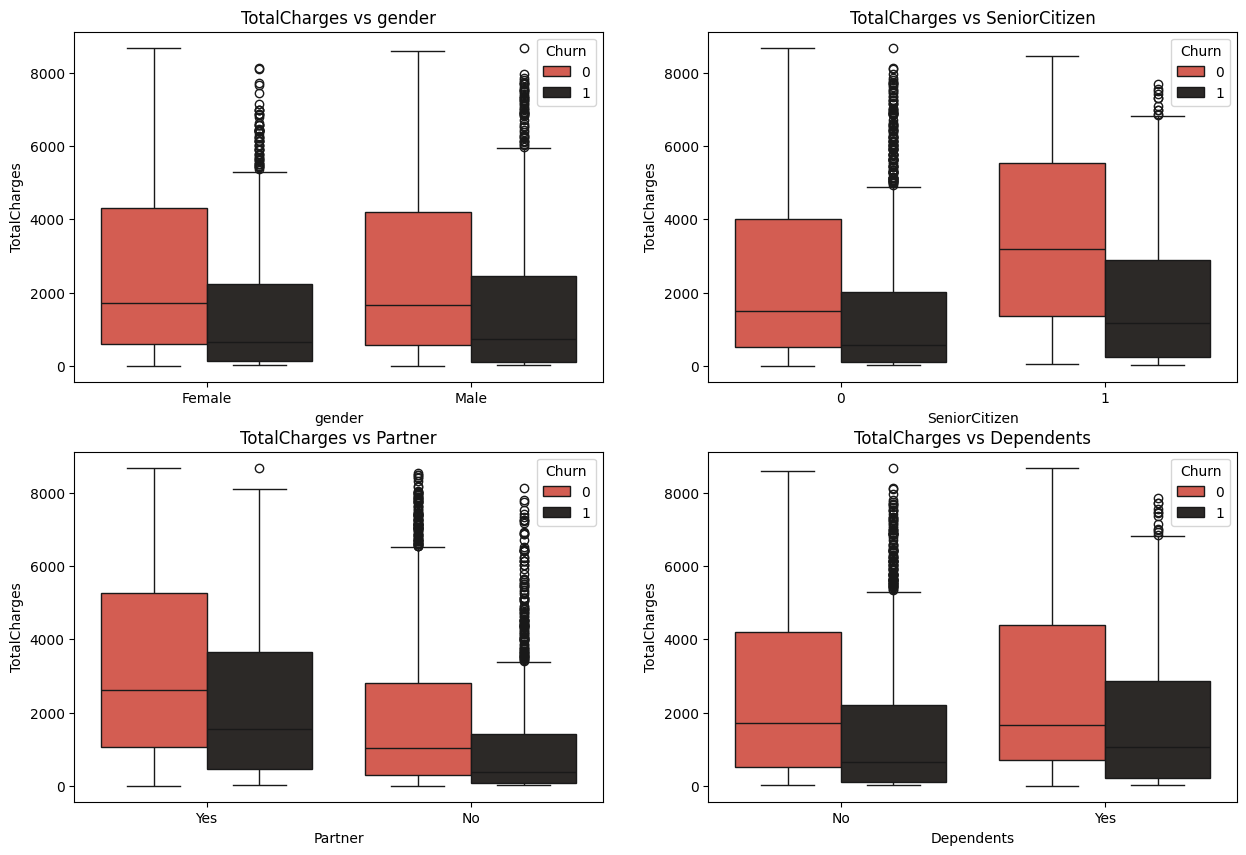

In [42]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (15,10))
for i in range(4):
    plt.subplot(2,2,i+1)
    ax = sns.boxplot(x = l1[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l1[i]);

### Yorumlar

* Erkek ve kadın müşteriler için Toplam Ücretler tamamen aynıdır! Hizmete devam eden SeniorCitizens(KıdemliVatandaşların) Toplam Ücret başlangıç ve kapanış değerleri daha yüksektir.

* Eşleriyle birlikte yaşayan müşterilerin Toplam Ücret ortalama değeri, yalnız yaşayanlara kıyasla daha yüksektir!

## TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies 


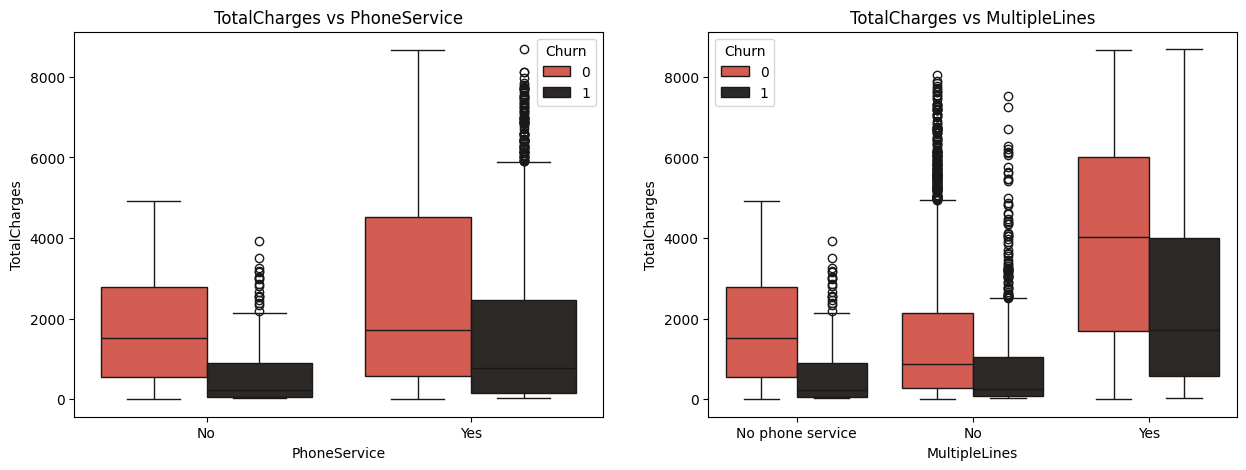

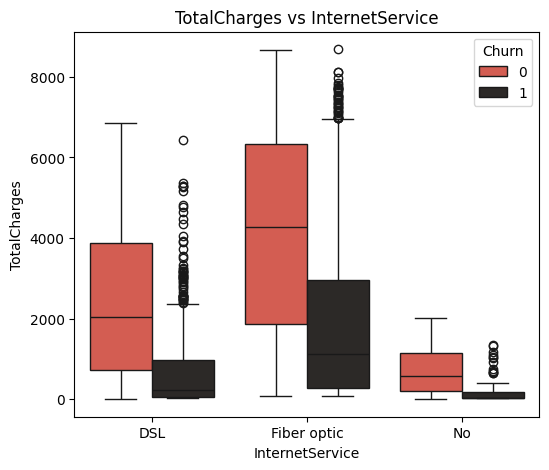

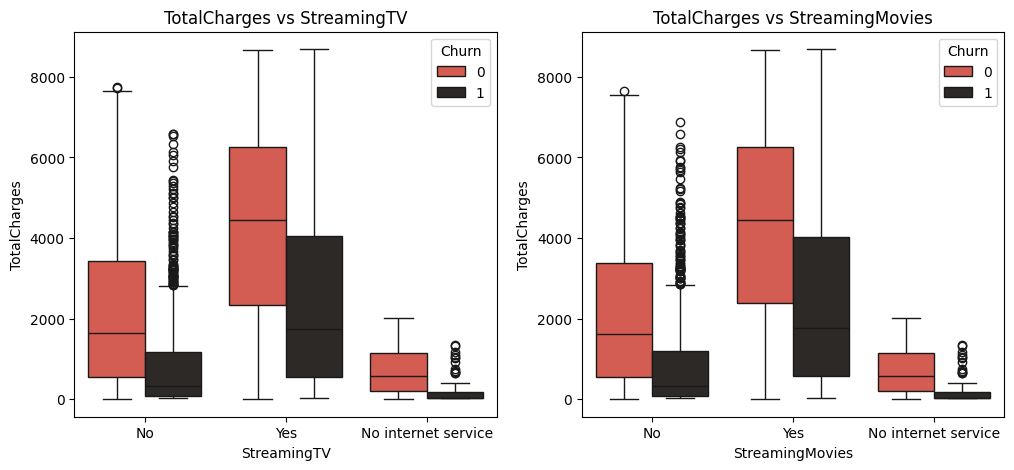

In [43]:
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

for i in range(len(l2[0:2])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i]);

fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

plt.subplot(1,1,1)
ax = sns.boxplot(x = l2[2],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
plt.title('TotalCharges vs ' + l2[2]);
    
fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

for i in range(len(l2[3:5])):
    plt.subplot(1,2,i + 1)
    ax = sns.boxplot(x = l2[i + 3],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i + 3]);

### Yorumlar

* TelefonServis Toplam Ücretleri 0 - 4000 arasında değişmektedir. Ancak müşteriler, Toplam Ücretler nedeniyle Telefon Servisi hakkında 1000 civarından itibaren 2. düşüncelere sahip olmaya başlarlar.

* Benzer şekilde müşteriler MultipleLines'a 2000 civarında ödeme yapmaktan çekinmeye başlıyor. Ancak bazı müşteriler, MultipleLines'a 6000 civarında bir değer ödedikleri için umutsuz görünüyorlar!

* Fiber Optik kablo ödemesine gelince, müşteriler 2000 civarında ödeme yaparak ürünleri test ediyor!

* Fiber Optik, StreamingTV ve StreamingMovies'e benzer şekilde hizmetlere devam eden müşteriler 3000 - 6000 arasında ödeme yapar.

## TotalCharges vs Group 2: Services Subscribed by the Customer : OnlineSecurity | OnlineBackup | DeviceProtection | TechSupport |


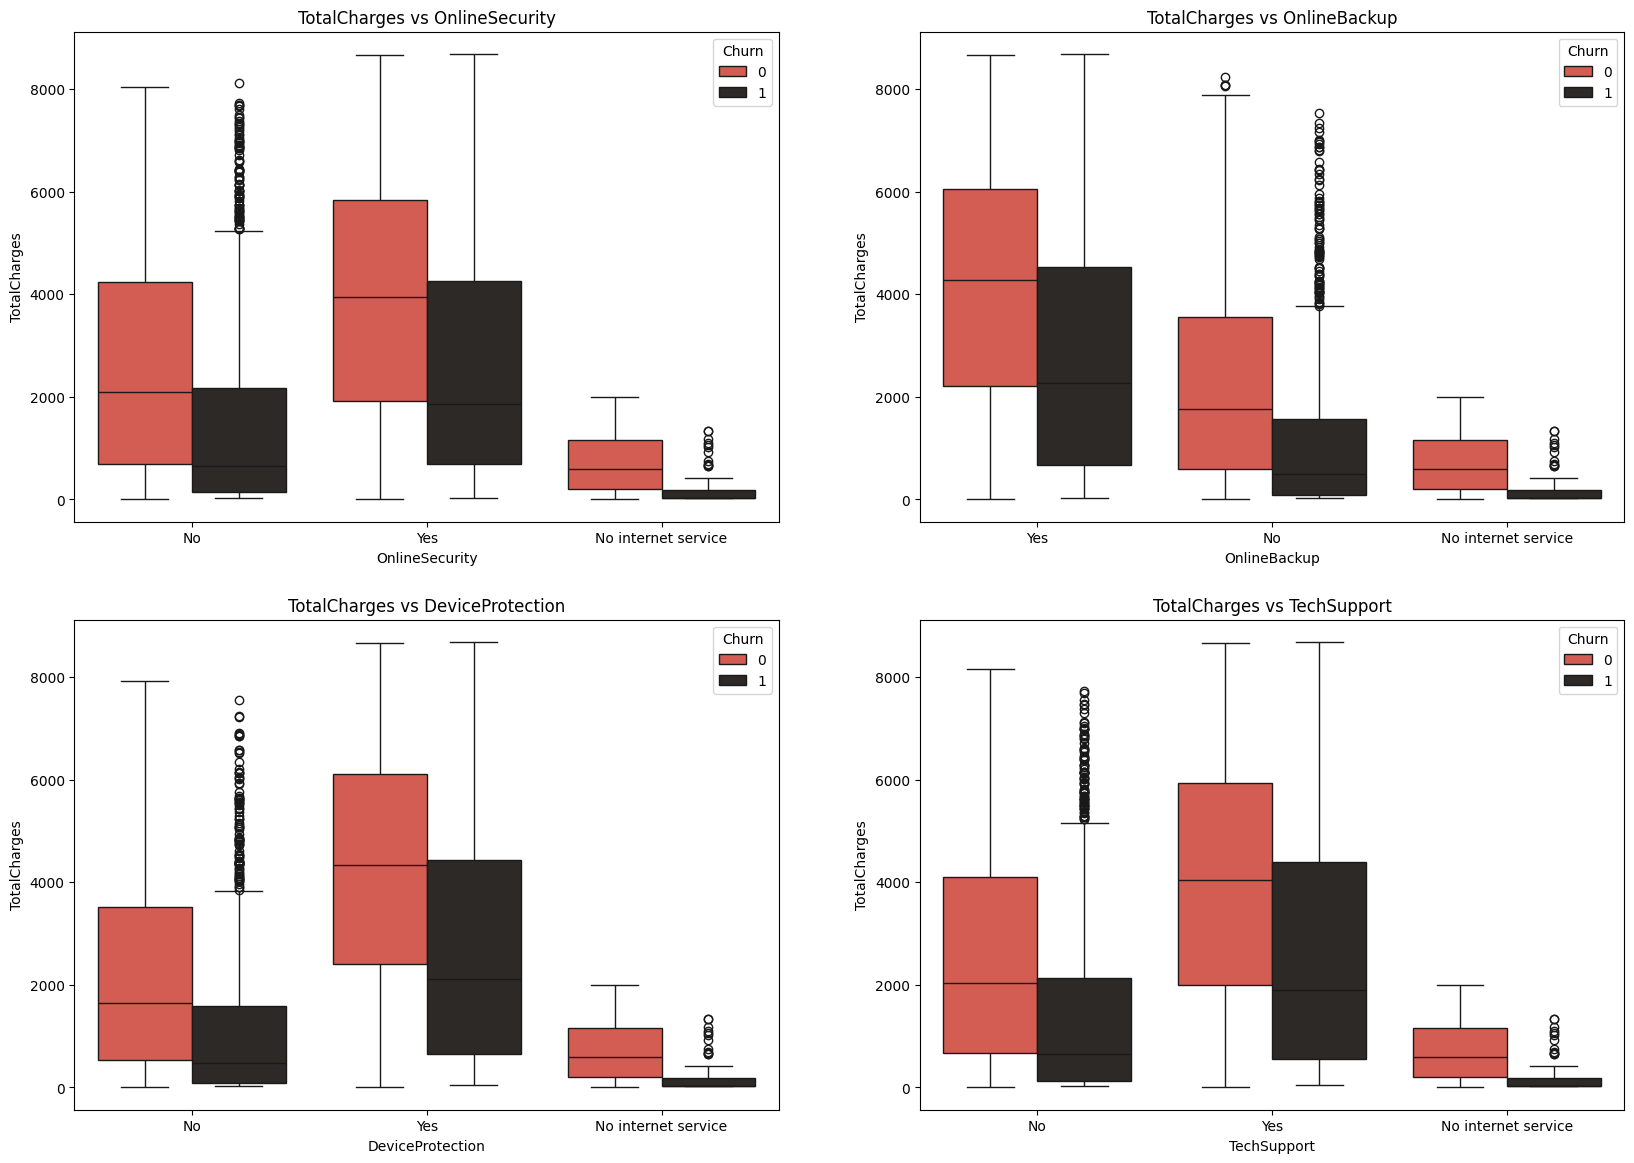

In [44]:
fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
for i in range(len(l2[-4:])):
    plt.subplot(2,2,i + 1)
    ax = sns.boxplot(x = l2[i - 4],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l2[i-4]);

Yukarıda belirtilen tüm özellikler için müşteriler, 2000 yılı civarında bunlar için ödeme yapma konusunda şüpheci olmaya başlıyor. Kaybedilen müşterilerin bu medyan değeri, bu hizmeti sürdüren müşterilerin alt sınırına çok yakındır.

Abonelikten çıkmayan müşteriler 2000 - 6000 arası Toplam Ücret ödemeye hazırdır.

## TotalCharges vs Group 3 : Contract | PaperlessBilling | PaymentMethod |¶


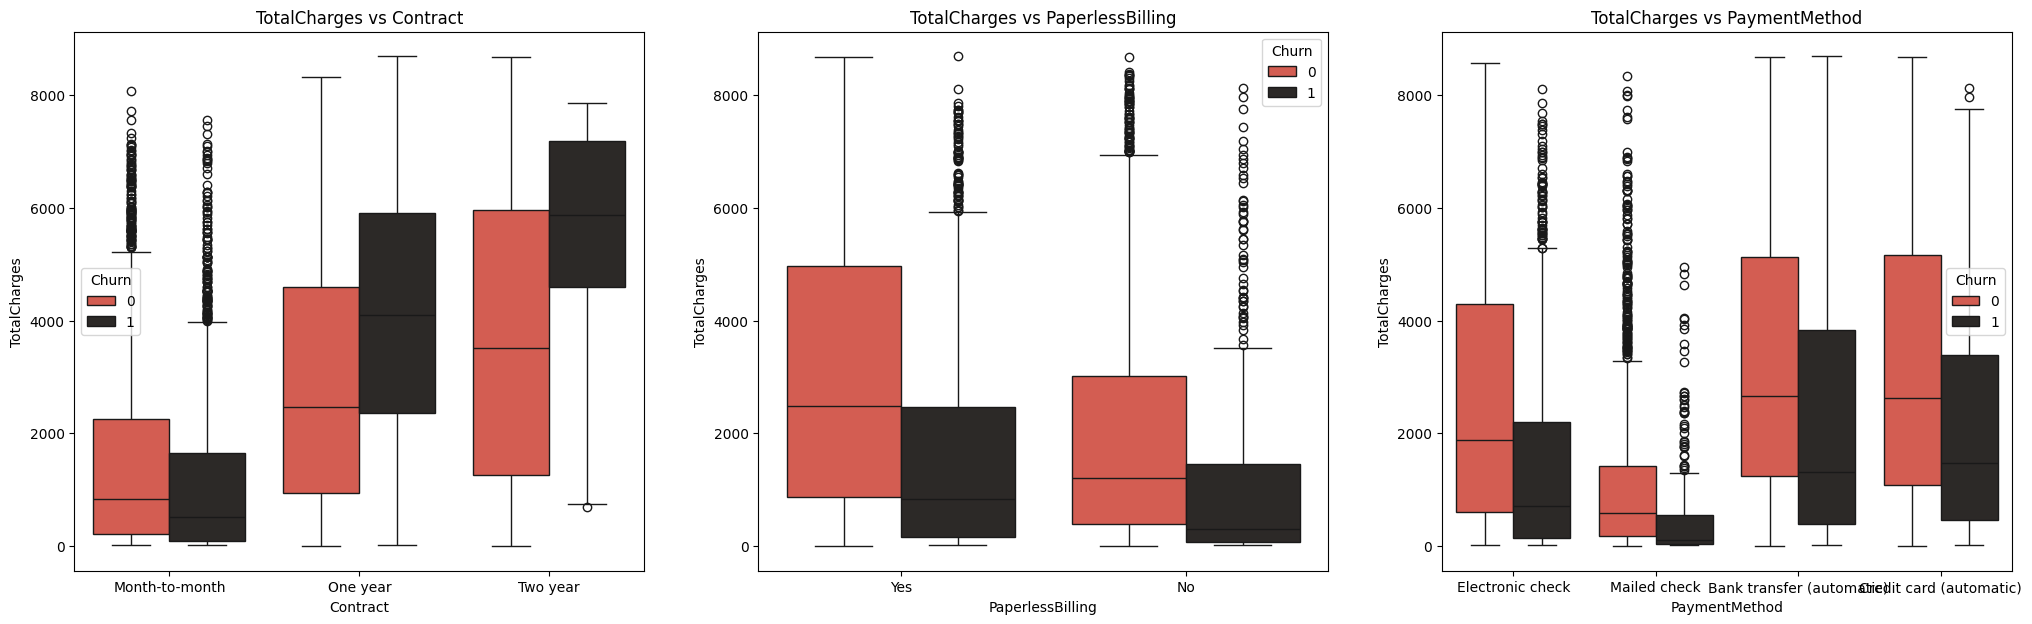

In [45]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

for i in range(len(l3)):
    plt.subplot(1,3,i + 1)
    ax = sns.boxplot(x = l3[i],y = 'TotalCharges',data = df,hue = 'Churn',palette = colors);
    plt.title('TotalCharges vs ' + l3[i]);

### Yorumlar

* Bir yıllık ve iki yıllık sözleşmeli hizmetlerden vazgeçmeye karar veren müşterilerin ortalama değerleri 4000 ve 6000 civarında yüksek. İki yıllık sözleşmeli müşterilerden bazıları 7000 civarında ödeme bile yaptı.

* PaymentMethod için müşteriler 0 - 2000 arası daha kısa bir aralık için Elektronik çek kullanarak ödeme yapmaya şüpheyle yaklaşırken, Banka havalesi (otomatik) ve Kredi Kartı (otomatik) için bu aralık 0 - 4000 civarındadır.

## Numerical features vs Numerical features w.r.t Target variable (Churn) :


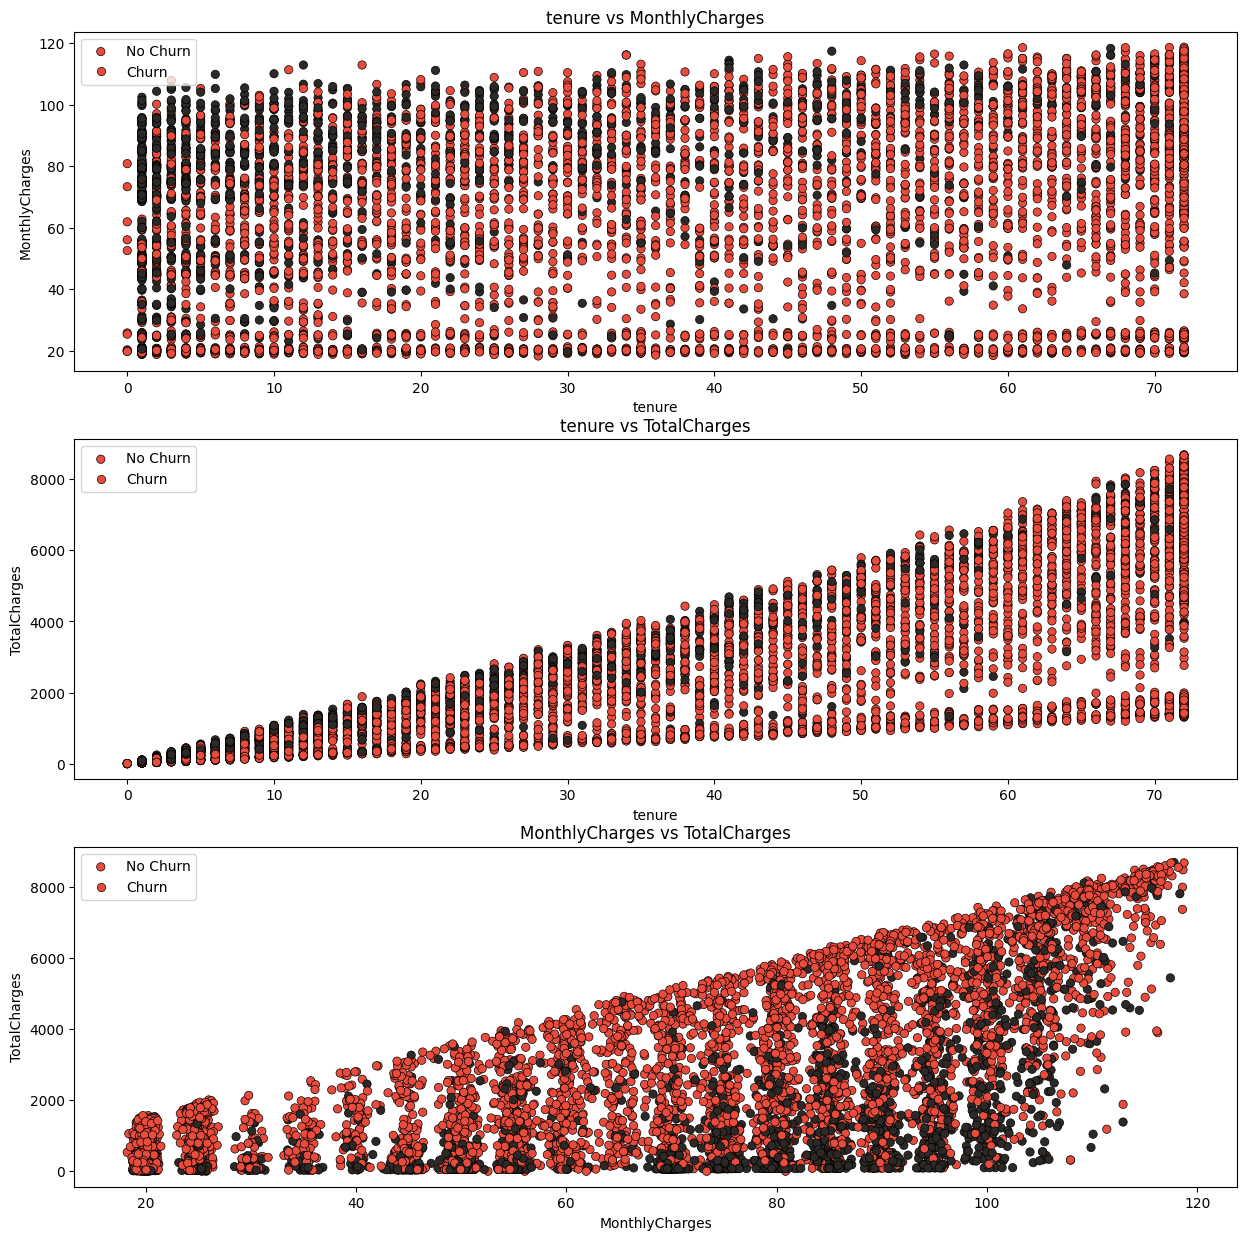

In [46]:
a = 0
fig,ax = plt.subplots(nrows = 3,ncols = 1,figsize = (15,15))
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        if i != j and j > i:
            a += 1
            plt.subplot(3,1,a)
            sns.scatterplot(x = num_cols[i],y = num_cols[j],data = df,hue = 'Churn',palette = colors,edgecolor = 'black');
            plt.legend(['No Churn','Churn'],loc = 'upper left',)
            title = num_cols[i] + ' vs ' + num_cols[j]
            plt.title(title)

### Comments

0 - 20 aylık kullanım süresi için, müşterilerin herhangi bir MonthlyCharges değerinde oldukça dalgalanması.

20 - 60 ay arasındaki kullanım süresi boyunca, MonthlyCharges değerlerinin (70 - 120) en üst sınırındaki müşteriler hizmetlerden ayrılmaya başlar.

TotalCharges ve görev süresi için, görev süresi arttıkça TotalCharges da artar! Planlarından çıkan müşteriler, kullanım süreleri boyunca en yüksek ücretlendirilen müşteriler ve Toplam Ücretleri ortada olan birkaç müşteridir!

Aylık Ücretler 70 ve üzerine ulaştığında müşteriler aboneliklerini iptal etmeye karar vermiş görünüyordu.

# Feature Engineering

In [47]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

df.drop(columns = ['MonthlyCharges_Group','TotalCharges_Group'], inplace = True)

df['tenure'] = mms.fit_transform(df[['tenure']])
df['MonthlyCharges'] = mms.fit_transform(df[['MonthlyCharges']])
df['TotalCharges'] = mms.fit_transform(df[['TotalCharges']])
df.head()

gender  SeniorCitizen Partner Dependents    tenure PhoneService  \
0  Female              0     Yes         No  0.013889           No   
1    Male              0      No         No  0.472222          Yes   
2    Male              0      No         No  0.027778          Yes   
3    Male              0      No         No  0.625000           No   
4  Female              0      No         No  0.027778          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check        0.115423      0.003437   
1               No               Mailed check        0.385075      0.217564   
2              Yes               Mailed check        0.354229      0.012453   
3               No  Bank transfer (automatic)        0.239303      0.211951   
4              Yes           Electronic check        0.521891      0.017462   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

### Yorumlar

Makine öğrenimi modeli, özelliklerin değerlerinin birimlerini anlamıyor. Girdiyi basit bir sayı gibi ele alır ancak bu değerin gerçek anlamını anlamaz. Dolayısıyla verileri ölçeklendirmek gerekli hale geliyor.


* Veri ölçeklendirme için 2 seçeneğimiz var: 1) Normalleştirme 2) Standardizasyon.

* Algoritmaların çoğu, verilerin normal (Gaussian) dağıldığını varsaydığından, verileri normal dağılım göstermeyen özellikler için normalleştirme yapılır ve değerleri karşılaştırıldığında değerleri çok büyük veya çok küçük olan normal dağılımlı özellikler için standardizasyon yapılır. diğer özelliklere.

* Normalleştirme: Kullanım süresi, MonthlyCharges ve TotalCharges özellikleri sağa çarpık ve iki modlu bir veri dağılımı sergiledikleri için normalleştirildi.

* Standardizasyon: Yukarıdaki veriler için hiçbir özellik standartlaştırılmamıştır.

### Correlation Matrix

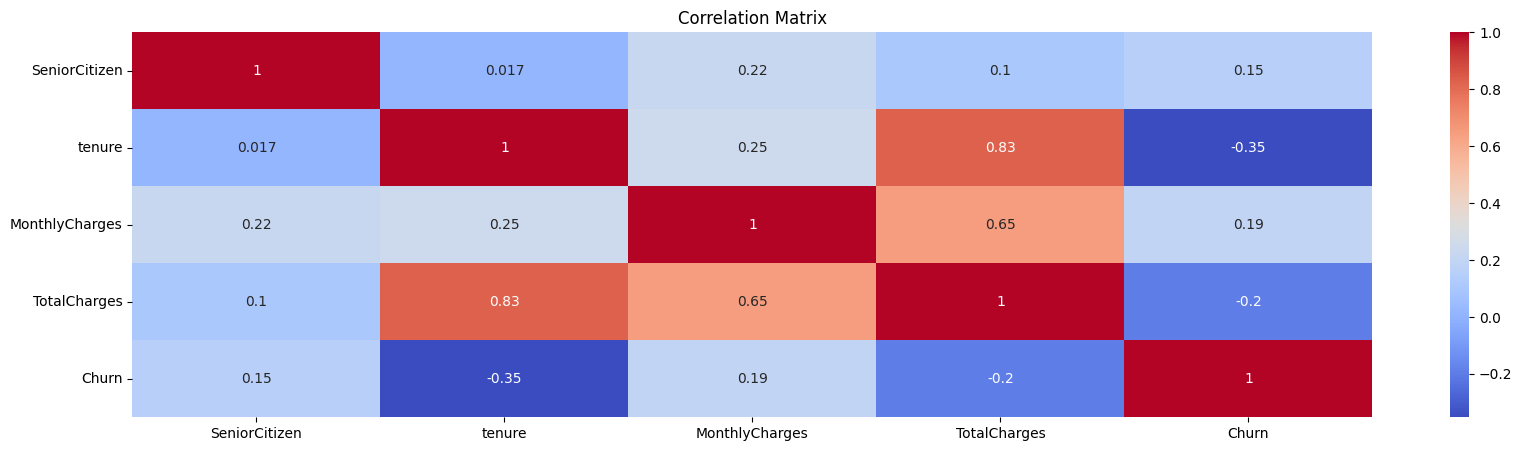

In [49]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the correlation matrix
plt.figure(figsize=(20, 5))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

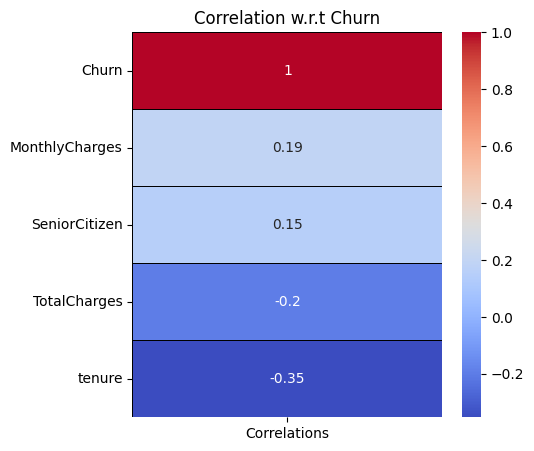

In [51]:
# corr = df.corrwith(df['Churn']).sort_values(ascending = False).to_frame()
# corr.columns = ['Correlations']
# plt.subplots(figsize = (5,5))
# sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black');
# plt.title('Correlation w.r.t Outcome');

numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation with 'Churn' column
# Make sure 'Churn' is numeric (0/1). If it's not, convert it first.
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

corr = numeric_df.corrwith(df['Churn']).sort_values(ascending=False).to_frame()
corr.columns = ['Correlations']

# Plot heatmap
plt.subplots(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.4, linecolor='black')
plt.title('Correlation w.r.t Churn')
plt.show()

### Feature Selection 

In [52]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]

print('Label Encoder Transformation')
for i in text_data_features :
    df[i] = le.fit_transform(df[i])
    print(i,' : ',df[i].unique(),' = ',le.inverse_transform(df[i].unique()))

Label Encoder Transformation
gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [53]:
df.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0  0.013889             0   
1       1              0        0           0  0.472222             1   
2       1              0        0           0  0.027778             1   
3       1              0        0           0  0.625000             0   
4       0              0        0           0  0.027778             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2        0.115423      0.003437      0  
1                 0              3        0.385075      0.217564      0  
2                 1              3        0.354229      0.012453      1  
3                 0              0        0.239303      0.211951      0  
4                 1              2        0.521891      0.017462      1

In [54]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [55]:
df.loc[:,cat_cols]

gender  Partner  Dependents  PhoneService  MultipleLines  \
0          0        1           0             0              1   
1          1        0           0             1              0   
2          1        0           0             1              0   
3          1        0           0             0              1   
4          0        0           0             1              0   
...      ...      ...         ...           ...            ...   
7038       1        1           1             1              2   
7039       0        1           1             1              2   
7040       0        1           1             0              1   
7041       1        1           0             1              2   
7042       1        0           0             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  \
0               0            0                0         0                 1   
1               0            0                0         1                 0   
2               0            0                0         0                 1   
3               2            0                0         1                 0   
4               0            0                0         0                 1   
...           ...          ...              ...       ...               ...   
7038            2            2                2         1                 1   
7039            0            2                2         1                 1   
7040            0            0                0         0                 1   
7041            0            0                0         0                 1   
7042            2            2                2         2                 1   

      PaymentMethod  Churn  SeniorCitizen  
0                 2      0              0  
1                 3      0              0  
2                 3      1              0  
3                 0      0              0  
4                 2      1              0  
...             ...    ...            ...  
7038              3      0              0  
7039              1      0              0  
7040              2      0              0  
7041              3      1              1  
7042              0      0              0  

[7043 rows x 17 columns]

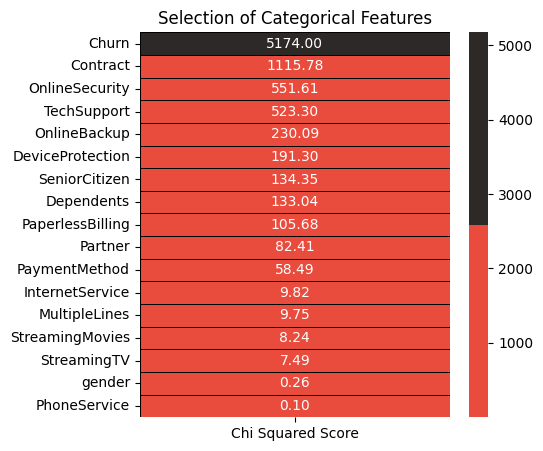

In [56]:
features = df.loc[:,cat_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = chi2,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

* PhoneService, cinsiyet, StreamingTV, StreamingMovies, MultipleLines ve InternetService, Churn ile çok düşük bir ilişki göstermektedir.

### Feature Selection for Numerical Features :¶


In [57]:
from sklearn.feature_selection import f_classif

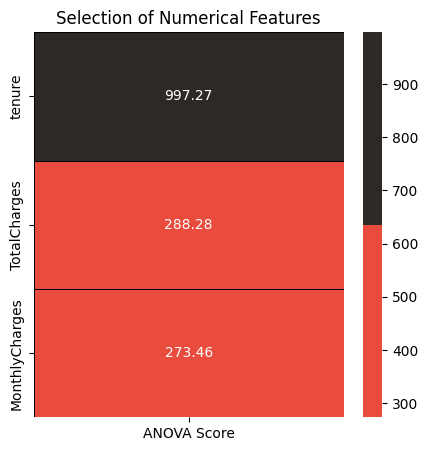

In [58]:
features = df.loc[:,num_cols]
target = df.loc[:,'Churn']

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

### Yorumlar

ANOVA testine göre ANOVA puanının değeri ne kadar yüksekse, özelliğin önemi de o kadar yüksektir.

Yukarıdaki sonuçlardan modelleme için tüm sayısal özellikleri dahil etmemiz gerekir.

In [59]:
df.drop(columns = ['PhoneService', 'gender','StreamingTV','StreamingMovies','MultipleLines','InternetService'],inplace = True)
df.head()

SeniorCitizen  Partner  Dependents    tenure  OnlineSecurity  OnlineBackup  \
0              0        1           0  0.013889               0             2   
1              0        0           0  0.472222               2             0   
2              0        0           0  0.027778               2             2   
3              0        0           0  0.625000               2             0   
4              0        0           0  0.027778               0             0   

   DeviceProtection  TechSupport  Contract  PaperlessBilling  PaymentMethod  \
0                 0            0         0                 1              2   
1                 2            0         1                 0              3   
2                 0            0         0                 1              3   
3                 2            2         1                 0              0   
4                 0            0         0                 1              2   

   MonthlyCharges  TotalCharges  Churn  
0        0.115423      0.003437      0  
1        0.385075      0.217564      0  
2        0.354229      0.012453      1  
3        0.239303      0.211951      0  
4        0.521891      0.017462      1

### Balancing

Dengesiz verilerle başa çıkmak için 2 seçenek vardır:

* Yetersiz örnekleme: Hedef değişkenin çoğunluk örneklerini kırpın.

* Aşırı Örnekleme : Hedef değişkenin azınlık örneklerini çoğunluk örneklerine yükseltin.

* Düşük örnekleme ve aşırı örnekleme ile deneme yanılma yaptıktan sonra, aşırı örneklemeye karar verdik!

Veri dengeleme için imblearn kullanacağız.
pip statement : pip install imbalanced-learn

In [60]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [61]:
over = SMOTE(sampling_strategy = 1)

f1 = df.iloc[:,:13].values
t1 = df.iloc[:,13].values

f1, t1 = over.fit_resample(f1, t1)
Counter(t1)

Counter({np.int64(0): 5174, np.int64(1): 5174})

# MODELING

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [63]:
x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.20, random_state = 2)

In [64]:
def model(classifier,x_train,y_train,x_test,y_test):
    
    classifier.fit(x_train,y_train)
    prediction = classifier.predict(x_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,x_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    plt.show()

def model_evaluation(classifier,x_test,y_test):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(x_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = 'Blues',fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(x_test)))

### 1-) XGB Classifier

In [65]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

In [66]:
model(classifier_xgb,x_train,y_train,x_test,y_test)

Cross Validation Score :  89.95%
ROC_AUC Score :  82.67%


              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1040
           1       0.80      0.86      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



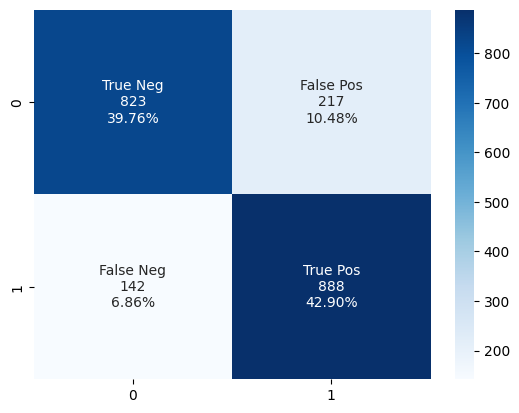

In [67]:
model_evaluation(classifier_xgb,x_test,y_test)

### 2) LGBM Classifier

In [80]:
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000, force_col_wise='true',verbose=-1)

In [81]:
model(classifier_lgbm,x_train,y_train,x_test,y_test)


Cross Validation Score :  90.21%
ROC_AUC Score :  82.82%


              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1040
           1       0.80      0.87      0.83      1030

    accuracy                           0.83      2070
   macro avg       0.83      0.83      0.83      2070
weighted avg       0.83      0.83      0.83      2070



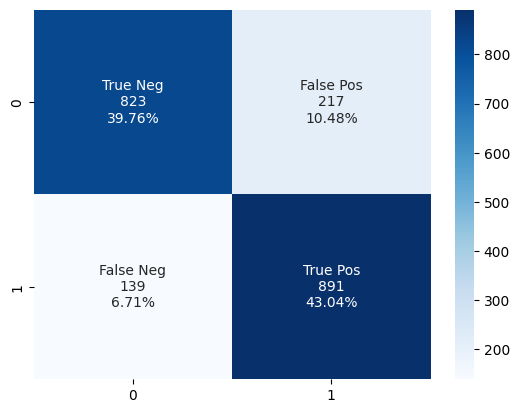

In [70]:
model_evaluation(classifier_lgbm,x_test,y_test)

## Random Forest Classifier

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)


In [72]:
model(classifier_rf,x_train,y_train,x_test,y_test)


Cross Validation Score :  85.40%
ROC_AUC Score :  78.19%


              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1040
           1       0.75      0.84      0.79      1030

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



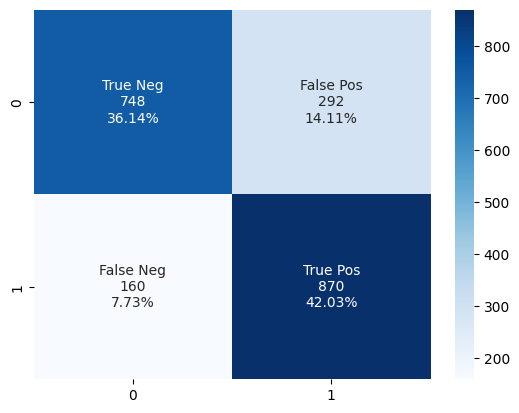

In [73]:
model_evaluation(classifier_rf,x_test,y_test)


# Decision Tree Classifier

In [74]:
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)


In [75]:
model(classifier_dt,x_train,y_train,x_test,y_test)


Cross Validation Score :  84.15%
ROC_AUC Score :  76.57%


              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1040
           1       0.76      0.77      0.77      1030

    accuracy                           0.77      2070
   macro avg       0.77      0.77      0.77      2070
weighted avg       0.77      0.77      0.77      2070



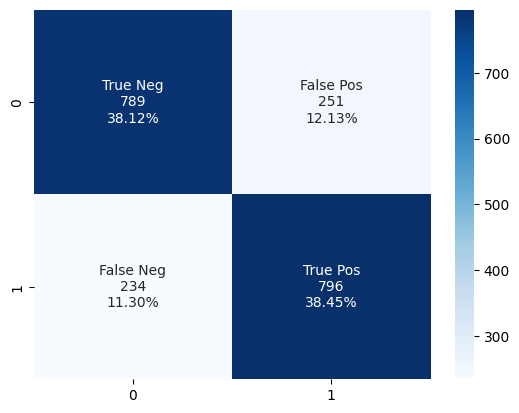

In [76]:
model_evaluation(classifier_dt,x_test,y_test)

## 5) Stack of XGBClassifier, LightGBMClassifier, Random Forest Classifer & Decision Tree Classifier


In [77]:
# from sklearn.ensemble import StackingClassifier

# stack = StackingClassifier(estimators = [('classifier_xgb',classifier_xgb),
#                                          ('classifier_lgbm',classifier_lgbm),
#                                          ('classifier_rf',classifier_rf),
#                                          ('classifier_dt',classifier_dt)],
#                            final_estimator = classifier_lgbm)

For stacking of classifiers, we stack the above 4 classifiers :

* XGBClassifier
* LightGBMClassifier
* RandomForestClassifier
* DecisionTreeClassifier
It has an important hyperparameter known as final_estimator. It is the classifier that makes the final prediction by using the predicted classes by the various classifier and predicts the final output.

In [78]:
# model(stack,x_train,y_train,x_test,y_test)

KeyboardInterrupt: 

In [ ]:
# model_evaluation(stack,x_test,y_test)

In [82]:
import joblib
joblib.dump(classifier_lgbm, 'best_churn_model.pkl')


['best_churn_model.pkl']

# Summary

* 3 tür müşteri hedeflenmelidir : SeniorCitizen, Living with a Partner, living all alone!

* SeniorCitizen müşterilerinin sayısı az ancak Monthly Charges alt limitleri diğer müşterilere göre daha yüksektir. Bu nedenle Senior Citizen müşterileri en yüksek doları ödemeye hazırdır ancak bu düzeyde hizmete ihtiyaçları vardır. Partnerli müşteriler ve yalnız yaşayan müşteriler Aylık Ücreti(Monthly Charges) 65'in altında olan hizmetleri tercih etmektedir.

* İlk 6 aylık görev süresi(tenure 1st 6months) boyunca, bu dönem müşteriler için en kritik ve belirsiz olduğundan, OnlineSecurity, OnlineBackup, DeviceProtection ve TechSupport konularına kapsamlı bir şekilde odaklanması gerekiyor. Bu hizmetler için 40 - 50 aylık kayıp süresini düşürmeleri gerekiyor!

* Müşteriler için sağlam bir destek hizmetleri hattı oluşturduktan sonra, Telefon Hizmeti ve İnternet Hizmeti için sırasıyla MultipleLines ve Fiber Optik kabloların kullanımını artırmaları gerekiyor.   Ancak bu 2 hizmetin önündeki en büyük engel, MonthlyCharges'da 75+'nin başlangıç noktasıdır.

* Bu nedenle, Telefon Hizmeti ve İnternet Hizmeti için sağlanan, bu Aylık Ücretlerin ortalamasının 100 - 120 aralığında olacağı seçenek kombinasyonlarını oluşturmaları gerekir:
-- No MultipleLines + OpticFiber
-- MultipleLines + DSL

* Bu, ortalama Aylık Ücreti muhtemelen 60 - 70 olan Çoklu Hat Yok + DSL(No MultipleLines+ DSL) kombinasyonunu seçme seçeneğini tamamen ortadan kaldıracağından kullanıcının ortalama gelirini artıracaktır!


* StreamingTV ve StreamingMovies'in uygun fiyatlı hale getirilmesi ve aynı zamanda kullanım süresinin kısaltılması gerekiyor. Bu hizmetlerin içeriği her türden müşteriyi hedeflemelidir. Bunun kolay ve sorunsuz bir Ödeme Yöntemi ile takip edilmesi gerekir.


* Yüksek kayıp nedeniyle ödeme amaçlı Elektronik çeke son verilmesi ve tamamen Banka Havalesi (otomatik) ve Kredi Kartına (otomatik) odaklanması gerekiyor! Ancak, bu 2 Ödeme Yöntemi için ortalama kayıp süresini 20 ayın üzerinde azaltmaları istenecektir; bu da Elektronik çekin kullanım süresinin iki katıdır. 


* Aylık Ücretlerde Elektronik çekin alt limiti 60 civarındayken, Banka Havalesi (otomatik) ve Kredi Kartının (otomatik) alt limiti 20 civarındadır. Kağıtsız Faturalandırma, 60 başlangıç noktasıyla başka bir pahalı özelliktir; diğer seçenekler ise MonthlyCharges'da 20'den başlayan ucuzdur.

